## 観測ロケットMOMO2号機のCバンドテレメトリ可視化

2018年6月30日（土）に打上げたMOMO2号機のCバンドテレメトリを可視化するスクリプト。

### 環境
Python 3.5 Anaconda

グラフが日本語表示されない場合は... http://qiita.com/knknkn1162/items/be87cba14e38e2c0f656

### 外部モジュール
https://github.com/scivision/pymap3d

In [4]:
import numpy as np
from numpy import pi, deg2rad, rad2deg, sin, cos
from scipy import interpolate
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (12,5)
plt.rcParams["savefig.dpi"] = 300
%config InlineBackend.figure_format = 'retina'


In [7]:
# ファイル読み込み
col = [x for x in range(1,152)]
df1 = pd.read_csv("../telemetry_csv/C_band/C_pc1_totallog.csv", names = col, index_col = False)
time1  = df1[1]

df_fireflyA = pd.read_csv("../telemetry_csv/C_band/PC1/telemC_pc1_firefly_a.csv")
df_fireflyB = pd.read_csv("../telemetry_csv/C_band/PC1/telemC_pc1_firefly_b.csv")

savename = "../telemetry_plot/Cband_telemetry/MOMO2_C_band_"
PC_num = "PC1_"

source_txt = "(Source: C band Telemetry)"

## バルブ動作

Text(0.5,1,'MOMO2 バルブ動作 デバイス側ステータス(Source: C band Telemetry)')

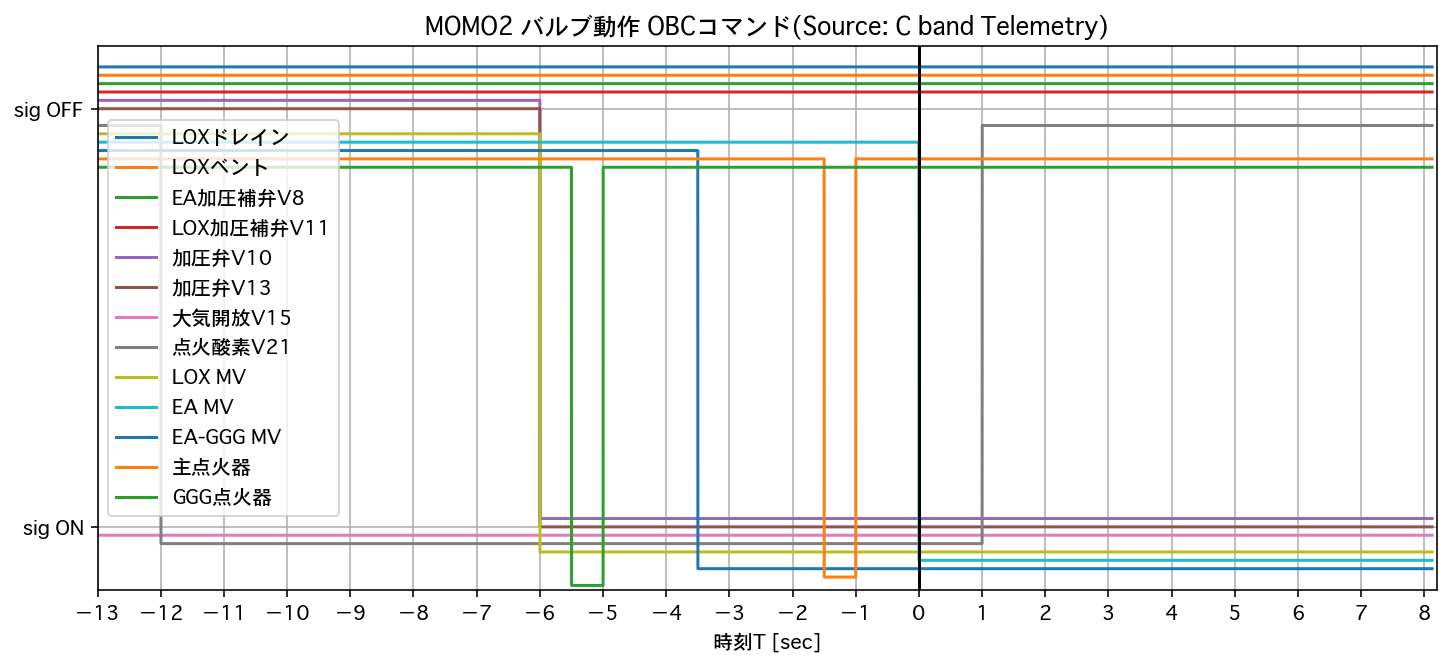

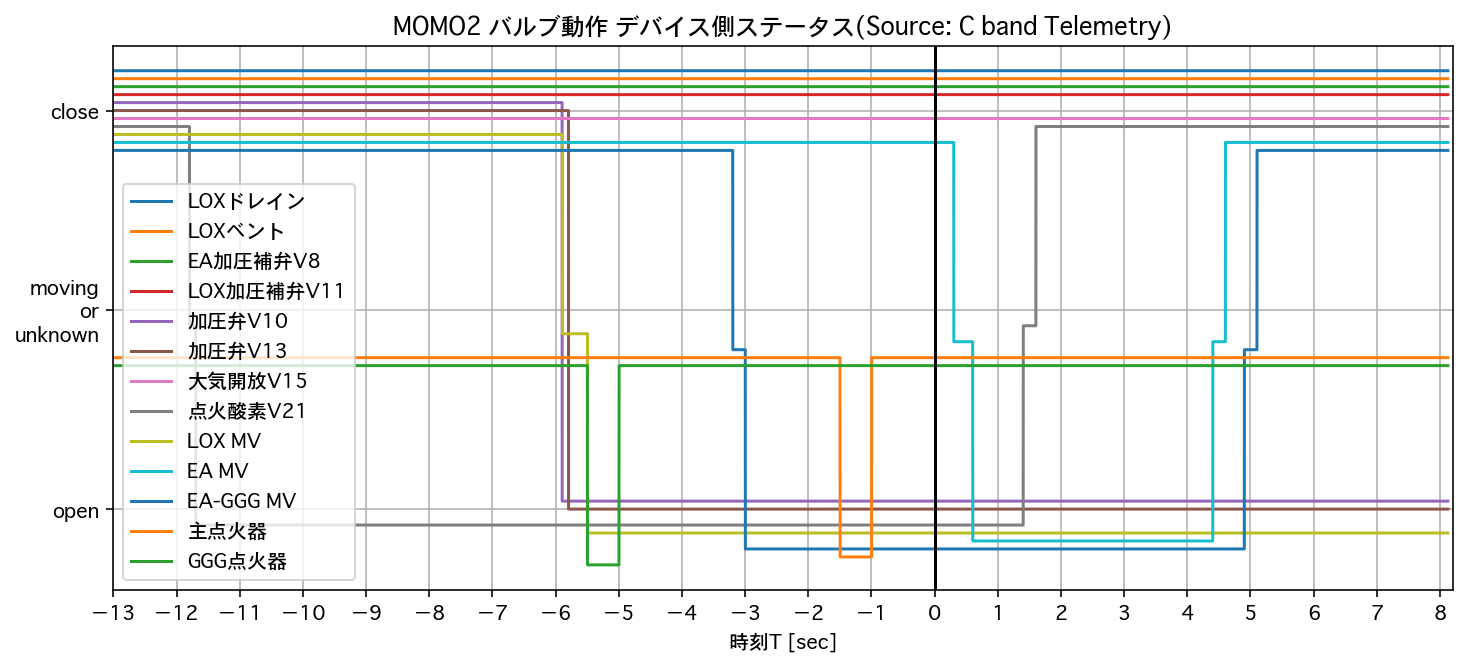

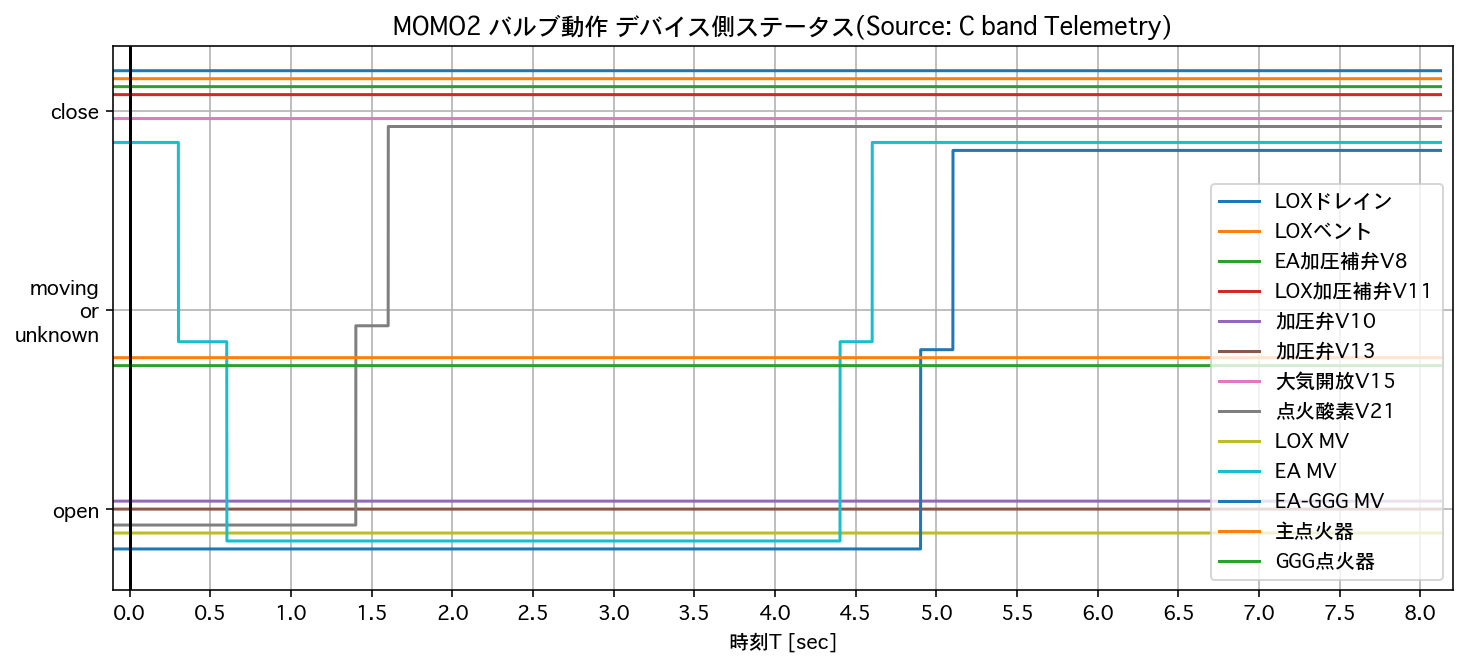

In [5]:
offset = 0.02
plt.figure()
plt.plot(df1[1], [0-5*offset for x in df1[1]], "-" , label="LOXドレイン")
plt.plot(df1[1], [0-4*offset for x in df1[1]], "-" , label="LOXベント")
plt.plot(df1[1], df1[8]-3*offset, "-" , label="EA加圧補弁V8")
plt.plot(df1[1], df1[11]-2*offset, "-" , label="LOX加圧補弁V11")
plt.plot(df1[1], df1[14]-1*offset, "-" , label="加圧弁V10")
plt.plot(df1[1], df1[14], "-" , label="加圧弁V13")
plt.plot(df1[1], df1[19]+1*offset, "-" , label="大気開放V15")
plt.plot(df1[1], df1[22]+2*offset, "-" , label="点火酸素V21")
plt.plot(df1[1], df1[25]+3*offset, "-" , label="LOX MV")
plt.plot(df1[1], df1[28]+4*offset, "-" , label="EA MV")
plt.plot(df1[1], df1[31]+5*offset, "-" , label="EA-GGG MV")
plt.plot(df1[1], df1[45]+6*offset, "-" , label="主点火器")
plt.plot(df1[1], df1[47]+7*offset, "-" , label="GGG点火器")
plt.yticks([1,0], ["sig ON", "sig OFF"])
plt.ylim([1.15, -0.15])
plt.xticks(np.arange(-13,9,1))
plt.xlim([-13, 8.2])
plt.axvline(x=0, color="k")
plt.xlabel("時刻T [sec]")
plt.grid()
plt.legend(loc="center left")
plt.title("MOMO2 バルブ動作 OBCコマンド" + source_txt)
plt.savefig(savename + PC_num + "valve_command" + ".png")

status_index = [6, 7, 9, 12, 15, 17, 20, 23, 26, 29, 32, 46, 48]
for i in status_index:
    df1[i] = df1[i].replace(0, 1.5)

offset = 0.02
plt.figure()
plt.plot(df1[1], df1[6]+5*offset, "-" , label="LOXドレイン")
plt.plot(df1[1], df1[7]+4*offset, "-" , label="LOXベント")
plt.plot(df1[1], df1[9]+3*offset, "-" , label="EA加圧補弁V8")
plt.plot(df1[1], df1[12]+2*offset, "-" , label="LOX加圧補弁V11")
plt.plot(df1[1], df1[15]+1*offset, "-" , label="加圧弁V10")
plt.plot(df1[1], df1[17], "-" , label="加圧弁V13")
plt.plot(df1[1], df1[20]-1*offset, "-" , label="大気開放V15")
plt.plot(df1[1], df1[23]-2*offset, "-" , label="点火酸素V21")
plt.plot(df1[1], df1[26]-3*offset, "-" , label="LOX MV")
plt.plot(df1[1], df1[29]-4*offset, "-" , label="EA MV")
plt.plot(df1[1], df1[32]-5*offset, "-" , label="EA-GGG MV")
plt.plot(df1[1], df1[46]-6*offset, "-" , label="主点火器")
plt.plot(df1[1], df1[48]-7*offset, "-" , label="GGG点火器")
plt.yticks([1, 1.5, 2], ["open", "moving\nor\nunknown", "close"])
plt.xticks(np.arange(-13,9,1))
plt.xlim([-13, 8.2])
plt.xlabel("時刻T [sec]")
plt.axvline(x=0, color="k")
plt.grid()
plt.legend()
plt.title("MOMO2 バルブ動作 デバイス側ステータス" + source_txt)
plt.savefig(savename + PC_num + "valve_status" + ".png")


offset = 0.02
plt.figure()
plt.plot(df1[1], df1[6]+5*offset, "-" , label="LOXドレイン")
plt.plot(df1[1], df1[7]+4*offset, "-" , label="LOXベント")
plt.plot(df1[1], df1[9]+3*offset, "-" , label="EA加圧補弁V8")
plt.plot(df1[1], df1[12]+2*offset, "-" , label="LOX加圧補弁V11")
plt.plot(df1[1], df1[15]+1*offset, "-" , label="加圧弁V10")
plt.plot(df1[1], df1[17], "-" , label="加圧弁V13")
plt.plot(df1[1], df1[20]-1*offset, "-" , label="大気開放V15")
plt.plot(df1[1], df1[23]-2*offset, "-" , label="点火酸素V21")
plt.plot(df1[1], df1[26]-3*offset, "-" , label="LOX MV")
plt.plot(df1[1], df1[29]-4*offset, "-" , label="EA MV")
plt.plot(df1[1], df1[32]-5*offset, "-" , label="EA-GGG MV")
plt.plot(df1[1], df1[46]-6*offset, "-" , label="主点火器")
plt.plot(df1[1], df1[48]-7*offset, "-" , label="GGG点火器")
plt.yticks([1, 1.5, 2], ["open", "moving\nor\nunknown", "close"])
plt.xticks(np.arange(0,9,0.5))
plt.xlim([-0.1, 8.2])
plt.xlabel("時刻T [sec]")
plt.axvline(x=0, color="k")
plt.grid()
plt.legend()
plt.title("MOMO2 バルブ動作 デバイス側ステータス" + source_txt)
plt.savefig(savename + PC_num + "valve_status_T+" + ".png")

## 圧力履歴

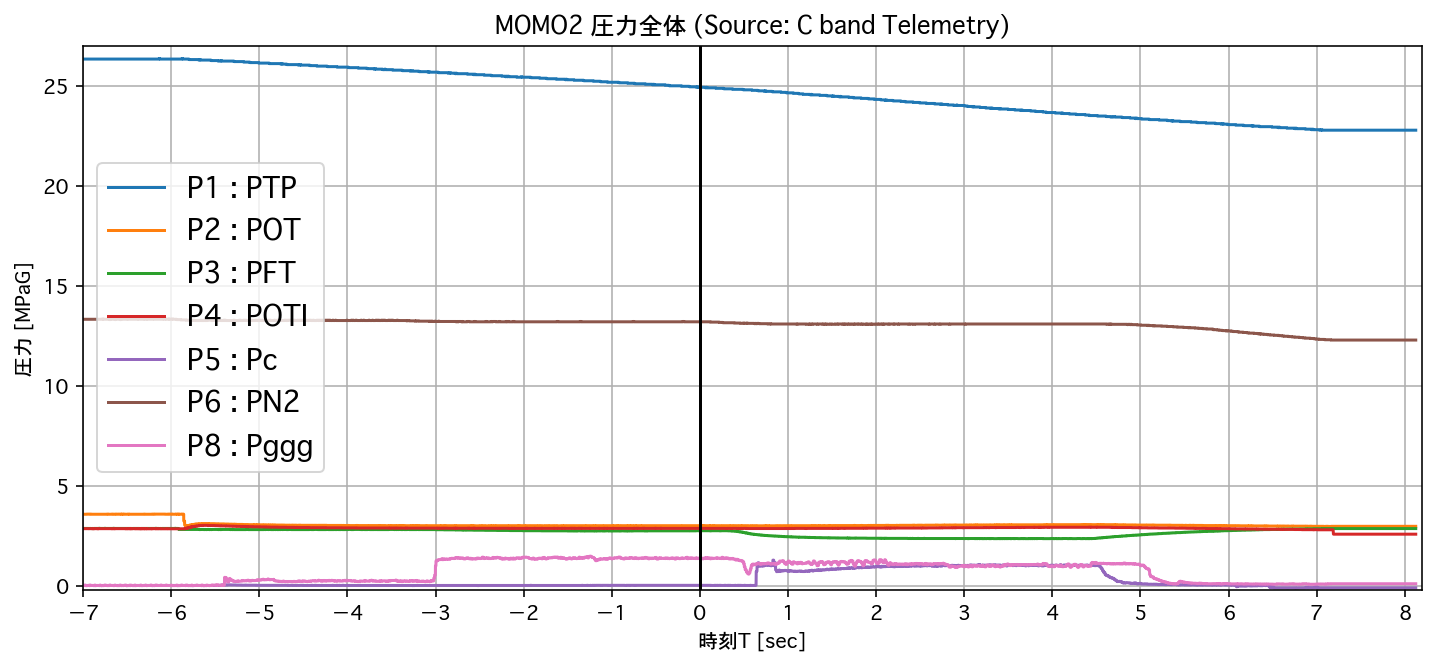

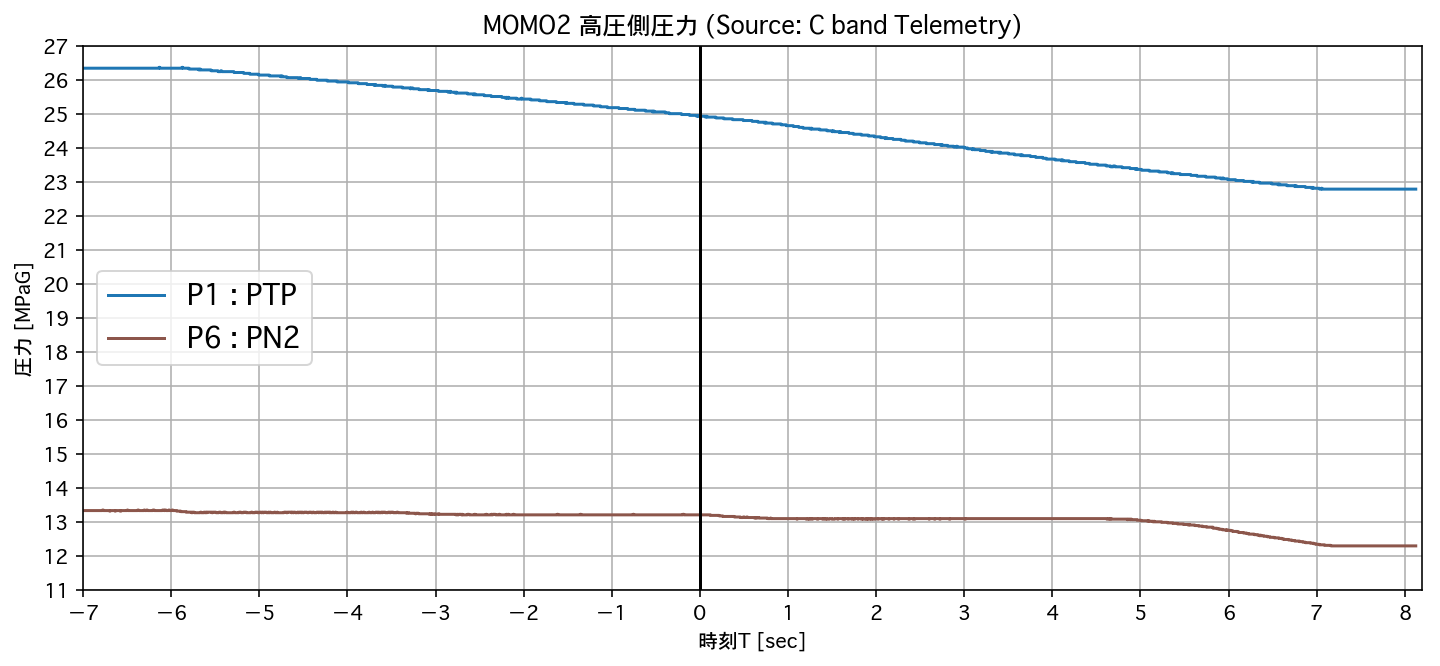

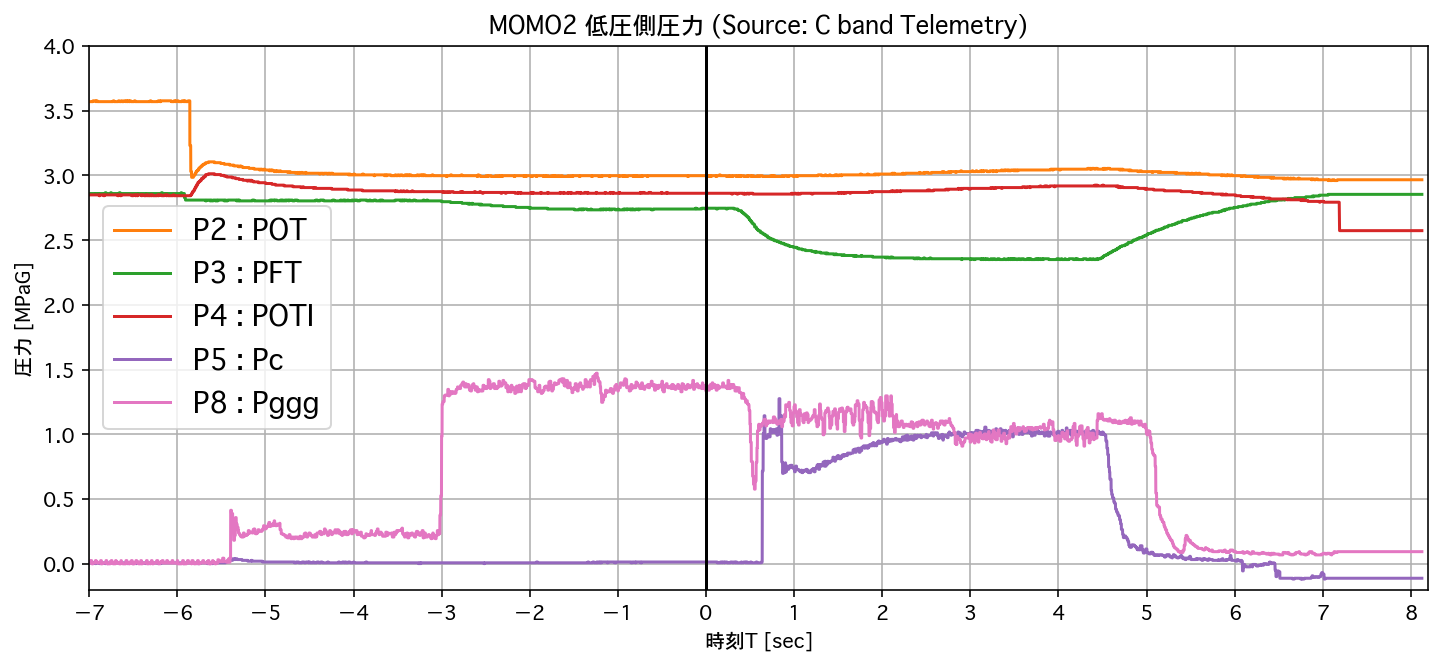

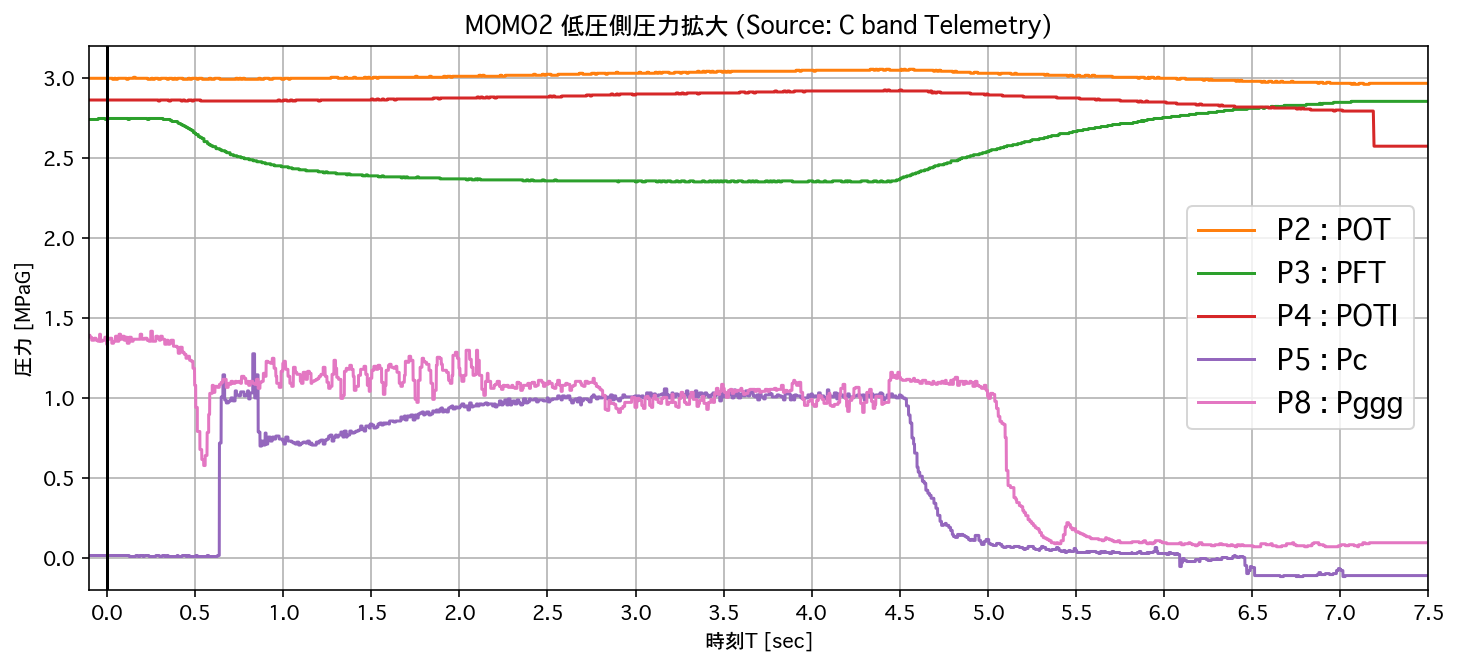

In [0]:
alpha = 1.0
plt.figure()
plt.plot(df1[1], df1[34], "-", color="C0", alpha=alpha, label="P1 : PTP")
plt.plot(df1[1], df1[35], "-", color="C1", alpha=alpha, label="P2 : POT")
plt.plot(df1[1], df1[36], "-", color="C2", alpha=alpha, label="P3 : PFT")
plt.plot(df1[1], df1[37], "-", color="C3", alpha=alpha, label="P4 : POTI")
plt.plot(df1[1], df1[38], "-", color="C4", alpha=alpha, label="P5 : Pc")
plt.plot(df1[1], df1[39], "-", color="C5", alpha=alpha, label="P6 : PN2")
plt.plot(df1[1], df1[40], "-", color="C6", alpha=alpha, label="P8 : Pggg")
plt.grid()
plt.legend(fontsize=14, loc = "center left")
plt.title("MOMO2 圧力全体 " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("圧力 [MPaG]")
plt.xticks(np.arange(-7,12,1))
plt.xlim([-7, 8.2])
# plt.ylim(ymin=0)
plt.ylim([-0.2, 27])
plt.axvline(x=0, color="k")
plt.savefig(savename + PC_num + "pressure_whole" + ".png")

plt.figure()
plt.plot(df1[1], df1[34], "-", color="C0", alpha=alpha, label="P1 : PTP")
plt.plot(df1[1], df1[39], "-", color="C5", alpha=alpha, label="P6 : PN2")
plt.grid()
plt.legend(fontsize=14, loc = "center left")
plt.title("MOMO2 高圧側圧力 " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("圧力 [MPaG]")
plt.xticks(np.arange(-7,12,1))
plt.xlim([-7, 8.2])
# plt.ylim(ymin=0)
plt.ylim([11, 27])
plt.yticks(np.arange(11,28,1))
plt.axvline(x=0, color="k")
plt.savefig(savename + PC_num + "pressure_high" + ".png")

plt.figure()
plt.plot(df1[1], df1[35], "-", color="C1", alpha=alpha, label="P2 : POT")
plt.plot(df1[1], df1[36], "-", color="C2", alpha=alpha, label="P3 : PFT")
plt.plot(df1[1], df1[37], "-", color="C3", alpha=alpha, label="P4 : POTI")
plt.plot(df1[1], df1[38], "-", color="C4", alpha=alpha, label="P5 : Pc")
plt.plot(df1[1], df1[40], "-", color="C6", alpha=alpha, label="P8 : Pggg")
plt.grid()
plt.legend(fontsize=14, loc = "center left")
plt.title("MOMO2 低圧側圧力 " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("圧力 [MPaG]")
plt.xticks(np.arange(-7,12,1))
plt.xlim([-7, 8.2])
# plt.ylim(ymin=0)
plt.ylim([-0.2, 4])
plt.axvline(x=0, color="k")
plt.savefig(savename + PC_num + "pressure_low1" + ".png")


plt.figure()
plt.plot(df1[1], df1[35], "-", color="C1", alpha=alpha, label="P2 : POT")
plt.plot(df1[1], df1[36], "-", color="C2", alpha=alpha, label="P3 : PFT")
plt.plot(df1[1], df1[37], "-", color="C3", alpha=alpha, label="P4 : POTI")
plt.plot(df1[1], df1[38], "-", color="C4", alpha=alpha, label="P5 : Pc")
plt.plot(df1[1], df1[40], "-", color="C6", alpha=alpha, label="P8 : Pggg")
plt.grid()
plt.legend(fontsize=14, loc = "center right")
plt.title("MOMO2 低圧側圧力拡大 " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("圧力 [MPaG]")
plt.xticks(np.arange(0,12,0.5))
plt.xlim([-0.1, 7.5])
# plt.ylim(ymin=0)
plt.ylim([-0.2, 3.2])
plt.axvline(x=0, color="k")
plt.savefig(savename + PC_num + "pressure_low2" + ".png")


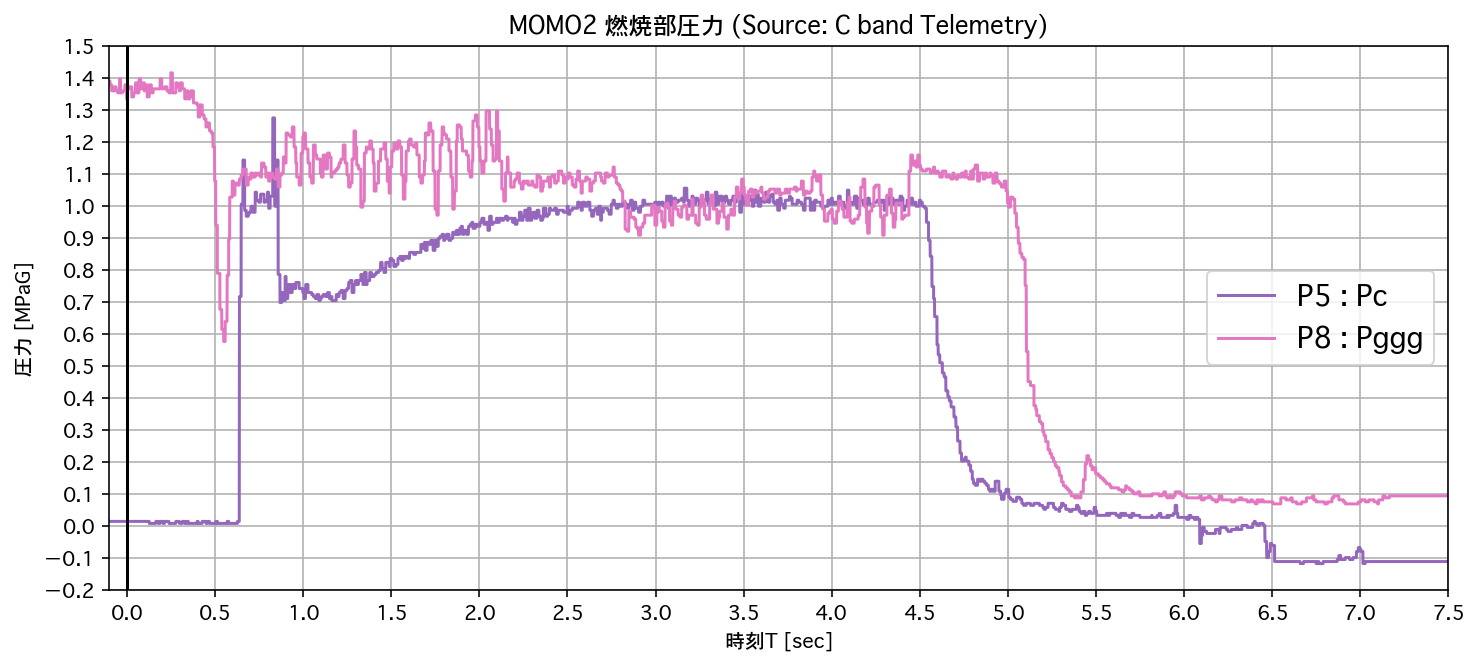

In [0]:
alpha = 1.0
plt.figure()
plt.plot(df1[1], df1[38], "-", color="C4", alpha=alpha, label="P5 : Pc")
plt.plot(df1[1], df1[40], "-", color="C6", alpha=alpha, label="P8 : Pggg")
plt.grid()
plt.legend(fontsize=14, loc = "center right")
plt.title("MOMO2 燃焼部圧力 " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("圧力 [MPaG]")
plt.xticks(np.arange(0,12,0.5))
plt.xlim([-0.1, 7.5])
# plt.ylim(ymin=0)
plt.ylim([-0.15, 1.5])
plt.yticks(np.arange(-0.2,1.6,0.1))
plt.axvline(x=0, color="k")
plt.savefig(savename + PC_num + "pressure_combustion" + ".png")

# plt.figure()
# plt.plot(df1[1].loc[df1[38].diff()!=0.0], df1[38].loc[df1[38].diff()!=0.0], "-", color="C4", alpha=alpha, label="P5 : Pc")
# plt.plot(df1[1].loc[df1[40].diff()!=0.0], df1[40].loc[df1[40].diff()!=0.0], "-", color="C6", alpha=alpha, label="P8 : Pggg")
# plt.grid()
# plt.legend(fontsize=14, loc = "lower right")
# plt.title("MOMO2 燃焼部点火時圧力 " + source_txt)
# plt.xlabel("時刻T [sec]")
# plt.ylabel("圧力 [MPaG]")
# plt.xticks(np.arange(0,1,0.1))
# plt.xlim([-0.05, 1])
# # plt.ylim(ymin=0)
# plt.ylim([-0.15, 1.5])
# plt.yticks(np.arange(-0.2,1.6,0.1))
# plt.axvline(x=0, color="k")
# plt.savefig(savename + PC_num + "pressure_ignition" + ".png")


## 温度

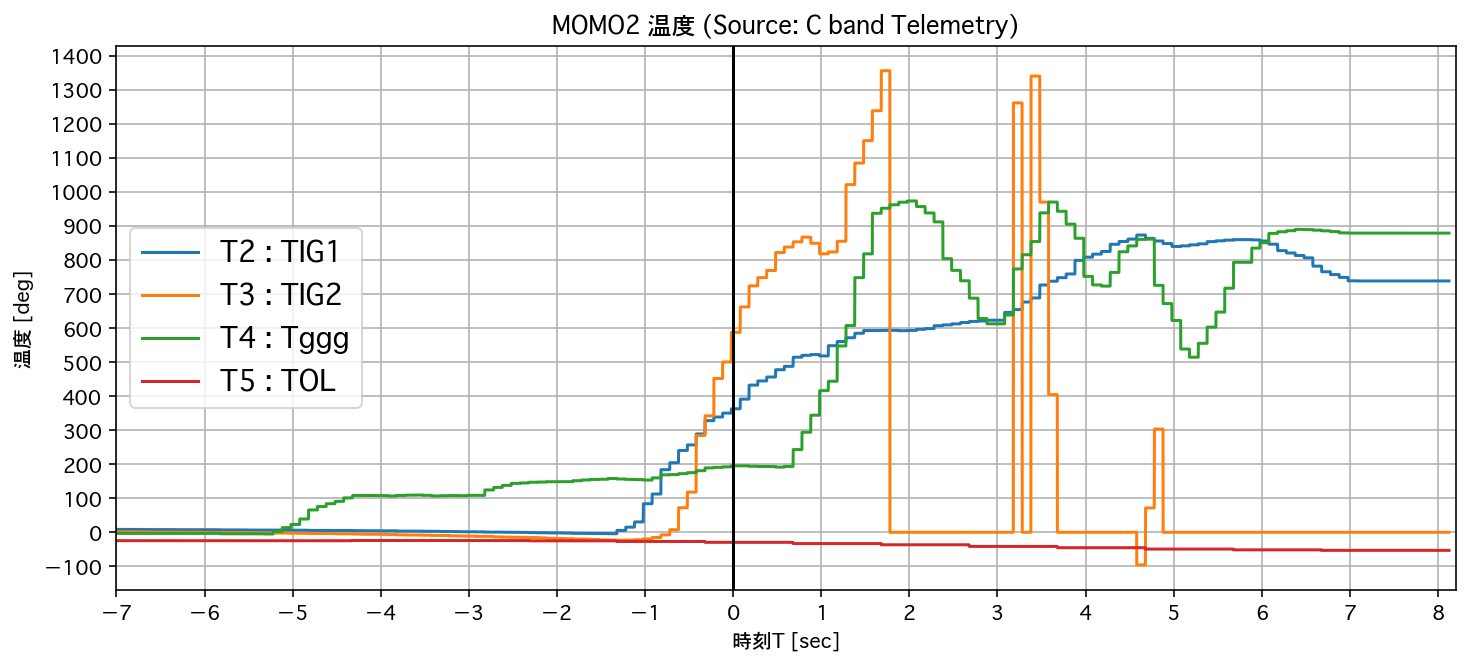

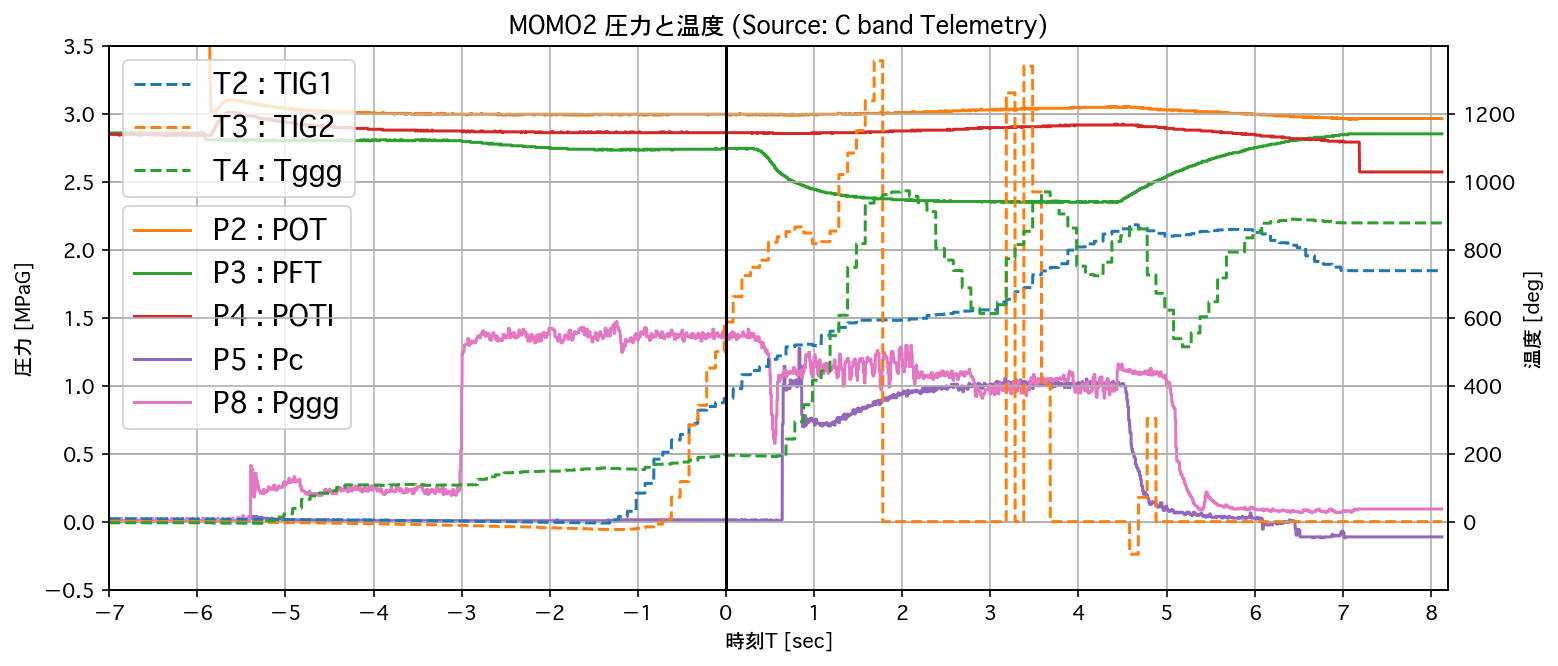

In [0]:
plt.figure()
plt.plot(df1[1], df1[41], "-", color="C0", label="T2 : TIG1 ")
plt.plot(df1[1], df1[42], "-", color="C1", label="T3 : TIG2")
plt.plot(df1[1], df1[43], "-", color="C2", label="T4 : Tggg")
plt.plot(df1[1], df1[44], "-", color="C3", label="T5 : TOL")
plt.grid()
plt.legend(fontsize=14, loc = "center left")
plt.title("MOMO2 温度 " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("温度 [deg]")
plt.xticks(np.arange(-7,12,1))
plt.yticks(np.arange(-100,1500,100))
plt.xlim([-7, 8.2])
# plt.ylim(ymin=0)
# plt.ylim([-0.2, 27])
plt.axvline(x=0, color="k")
plt.savefig(savename + PC_num + "temperature" + ".png")


plt.figure()
plt.plot(df1[1], df1[35], "-", color="C1", alpha=alpha, label="P2 : POT")
plt.plot(df1[1], df1[36], "-", color="C2", alpha=alpha, label="P3 : PFT")
plt.plot(df1[1], df1[37], "-", color="C3", alpha=alpha, label="P4 : POTI")
plt.plot(df1[1], df1[38], "-", color="C4", alpha=alpha, label="P5 : Pc")
plt.plot(df1[1], df1[40], "-", color="C6", alpha=alpha, label="P8 : Pggg")
plt.legend(fontsize=14, loc = "center left")
plt.ylabel("圧力 [MPaG]")
plt.xlabel("時刻T [sec]")
plt.ylim([-0.5, 3.5])
plt.grid()
plt.twinx()
plt.plot(df1[1], df1[41], "--", color="C0", label="T2 : TIG1 ")
plt.plot(df1[1], df1[42], "--", color="C1", label="T3 : TIG2")
plt.plot(df1[1], df1[43], "--", color="C2", label="T4 : Tggg")
# plt.plot(df1[1], df1[44], "--", color="C3", label="T5 : TOL")
plt.grid()
plt.legend(fontsize=14, loc = "upper left", facecolor="white")
plt.title("MOMO2 圧力と温度 " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("温度 [deg]")
plt.xticks(np.arange(-7,12,1))
plt.yticks(np.arange(0,1400,200))
plt.xlim([-7, 8.2])
plt.ylim([-200, 1400])
plt.axvline(x=0, color="k")
plt.savefig(savename + PC_num + "temperature_pressure" + ".png")


## 姿勢制御

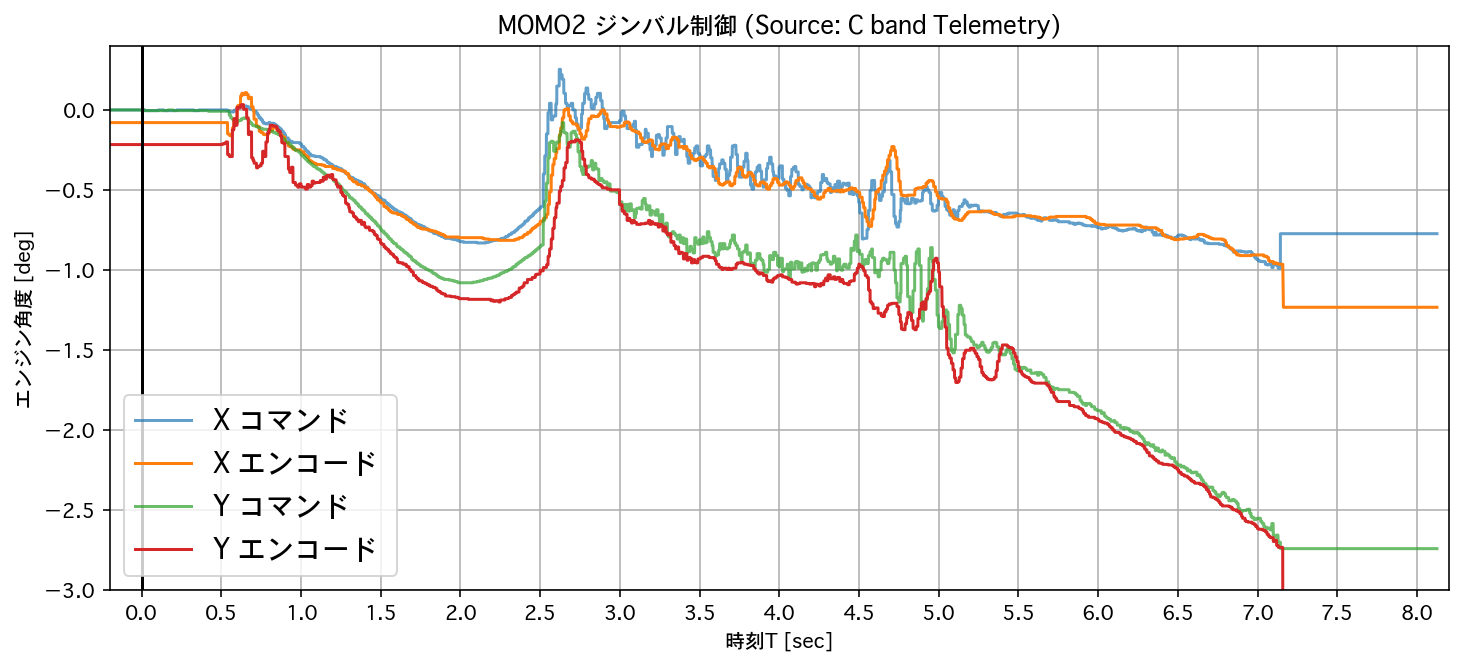

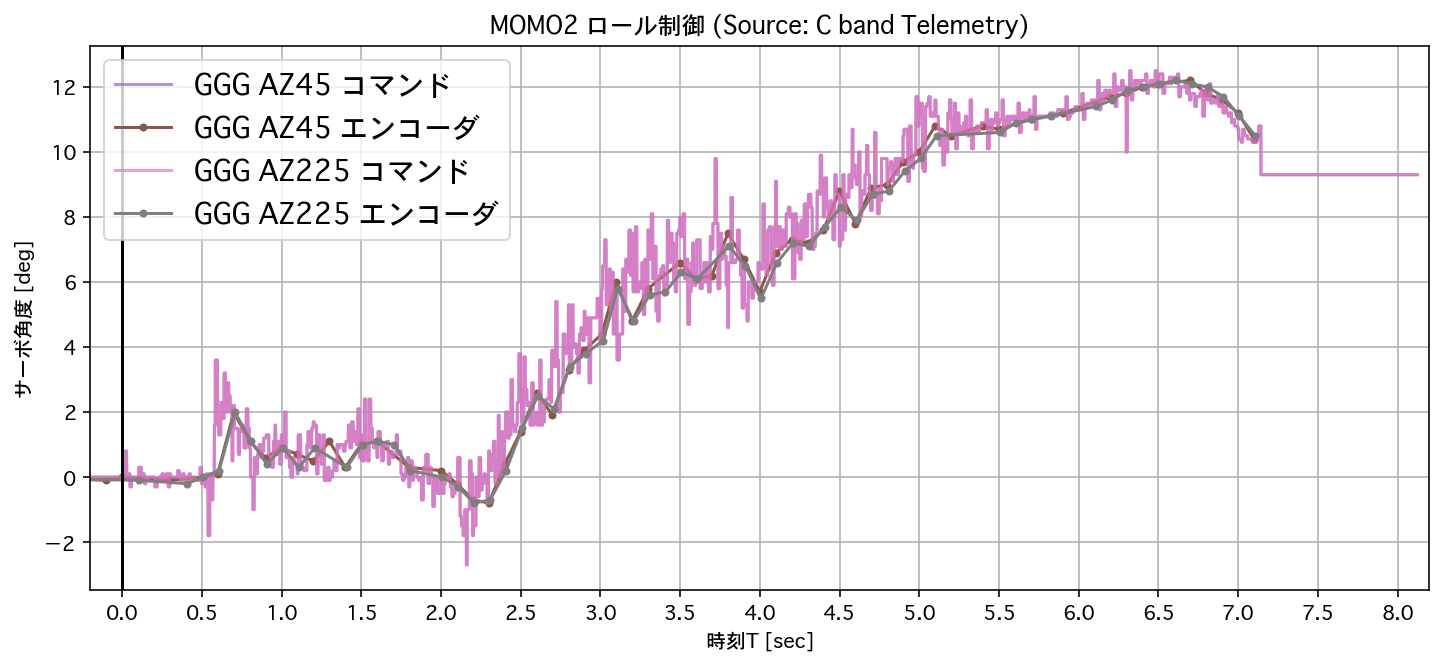

In [0]:
alpha = 0.7
plt.figure()
plt.plot(df1[1], df1[50], "-", alpha=alpha, color="C0", label="X コマンド ")
plt.plot(df1[1], df1[51], "-", color="C1", label="X エンコード ")
plt.plot(df1[1], df1[53], "-", alpha=alpha, color="C2", label="Y コマンド")
plt.plot(df1[1], df1[54], "-", color="C3", label="Y エンコード")
plt.grid()
plt.legend(fontsize=14, loc = "lower left")
plt.title("MOMO2 ジンバル制御 " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("エンジン角度 [deg]")
plt.xticks(np.arange(-7,8.5,0.5))
plt.xlim([-0.2, 8.2])
plt.ylim([-3, 0.4])
plt.axvline(x=0, color="k")
plt.savefig(savename + PC_num + "control_gimbal" + ".png")


plt.figure()
plt.plot(df1[1], df1[55], "-", alpha=alpha, color="C4", label="GGG AZ45 コマンド ")
plt.plot(df1[1].loc[df1[56].diff()!=0.0], df1[56].loc[df1[56].diff()!=0.0], ".-", color="C5", label="GGG AZ45 エンコーダ")
plt.plot(df1[1], df1[57], "-", alpha=alpha, color="C6", label="GGG AZ225 コマンド")
plt.plot(df1[1].loc[df1[58].diff()!=0.0], df1[58].loc[df1[58].diff()!=0.0], ".-", color="C7", label="GGG AZ225 エンコーダ")
plt.grid()
plt.legend(fontsize=14, loc = "upper left")
plt.title("MOMO2 ロール制御 " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("サーボ角度 [deg]")
plt.xticks(np.arange(-7,8.5,0.5))
plt.xlim([-0.2, 8.2])
# plt.ylim([-3, 0.4])
plt.axvline(x=0, color="k")
plt.savefig(savename + PC_num + "control_roll" + ".png")



## 加速度
１Fの加速度はエンジンの高振動環境においては物理現象とは異なる異常値を出すことを事前に判明している。そのため、1FのIMUの加速度センサの値は参照しないことに留意すること。

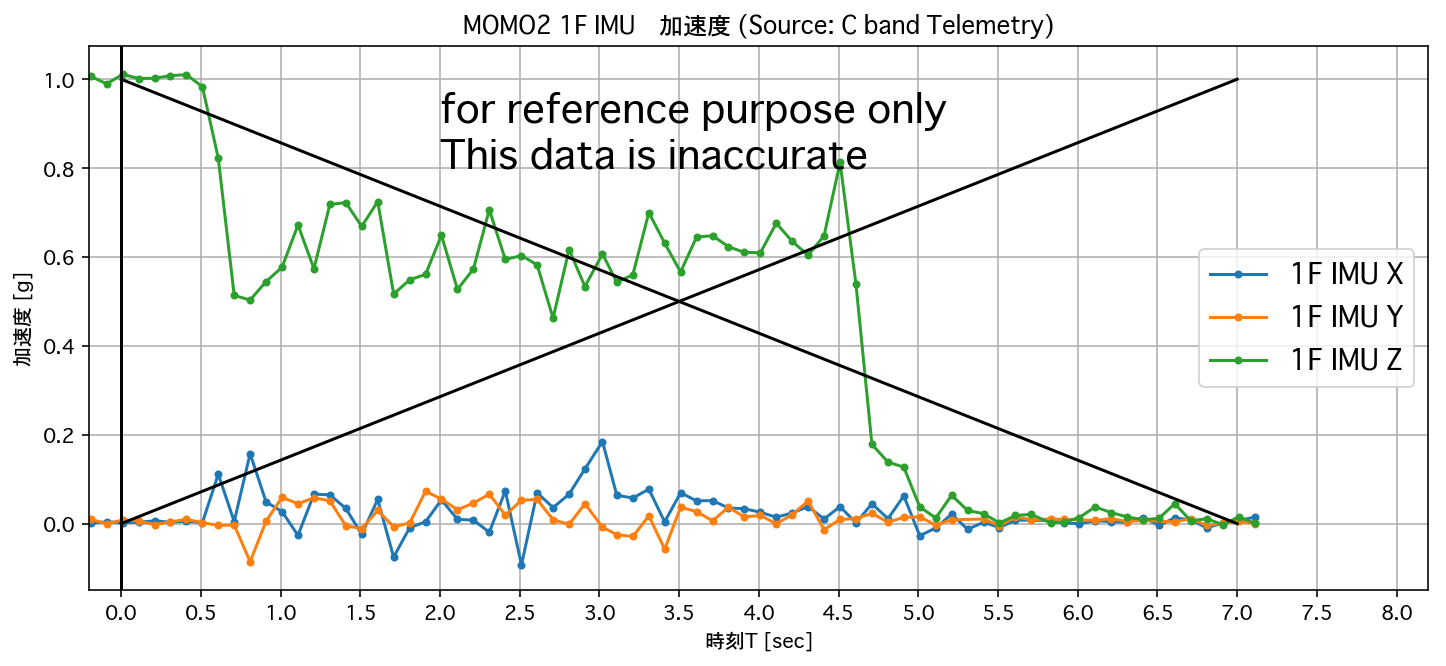

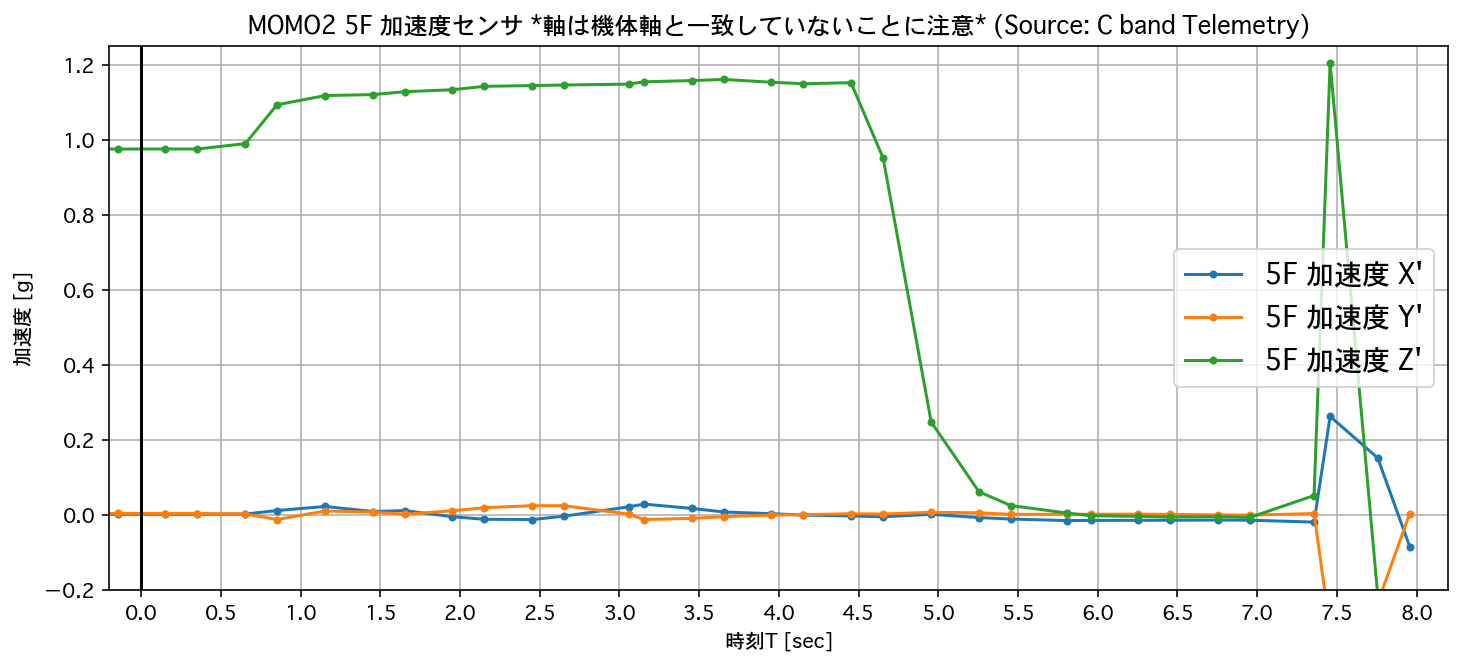

In [0]:
alpha = 1.0
plt.figure()
plt.plot(df1[1].loc[df1[72].diff()!=0.0], df1[72].loc[df1[72].diff()!=0.0], ".-", alpha=alpha, color="C0", label="1F IMU X")
plt.plot(df1[1].loc[df1[73].diff()!=0.0], df1[73].loc[df1[73].diff()!=0.0], ".-", alpha=alpha, color="C1", label="1F IMU Y")
plt.plot(df1[1].loc[df1[74].diff()!=0.0], df1[74].loc[df1[74].diff()!=0.0], ".-", alpha=alpha, color="C2", label="1F IMU Z")
plt.text(2.0, 0.8, "for reference purpose only\nThis data is inaccurate", fontsize=20)
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO2 1F IMU　加速度 " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("加速度 [g]")
plt.xticks(np.arange(-7,8.5,0.5))
plt.xlim([-0.2, 8.2])
# plt.ylim([-3, 0.4])
plt.axvline(x=0, color="k")
plt.plot([0, 7], [0, 1], 'k-') 
plt.plot([0, 7], [1, 0], 'k-') 
plt.savefig(savename + PC_num + "sensor_acc1F" + ".png")

# alpha = 1.0
# plt.figure()
# plt.plot(df1[1].loc[df1[88].diff()!=0.0], df1[88].loc[df1[88].diff()!=0.0], ".-", alpha=alpha, color="C0", label="5F IMU X")
# plt.plot(df1[1].loc[df1[89].diff()!=0.0], df1[89].loc[df1[89].diff()!=0.0], ".-", alpha=alpha, color="C1", label="5F IMU Y")
# plt.plot(df1[1].loc[df1[90].diff()!=0.0], df1[90].loc[df1[90].diff()!=0.0], ".-", alpha=alpha, color="C2", label="5F IMU Z")
# plt.grid()
# plt.legend(fontsize=14)
# plt.title("MOMO2 5F IMU　加速度 " + source_txt)
# plt.xlabel("時刻T [sec]")
# plt.ylabel("加速度 [g]")
# plt.xticks(np.arange(-7,8.5,0.5))
# plt.xlim([-0.2, 8.2])
# plt.ylim([-0.2, 1.8])
# plt.axvline(x=0, color="k")
# plt.savefig(savename + PC_num + "sensor_acc5F1" + ".png")


alpha = 1.0
plt.figure()
plt.plot(df1[1].loc[df1[91].diff()!=0.0], df1[91].loc[df1[91].diff()!=0.0], ".-", alpha=alpha, color="C0", label="5F 加速度 X'")
plt.plot(df1[1].loc[df1[92].diff()!=0.0], df1[92].loc[df1[92].diff()!=0.0], ".-", alpha=alpha, color="C1", label="5F 加速度 Y'")
plt.plot(df1[1].loc[df1[93].diff()!=0.0], df1[93].loc[df1[93].diff()!=0.0], ".-", alpha=alpha, color="C2", label="5F 加速度 Z'")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO2 5F 加速度センサ *軸は機体軸と一致していないことに注意* " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("加速度 [g]")
plt.xticks(np.arange(-7,8.5,0.5))
plt.xlim([-0.2, 8.2])
plt.ylim([-0.2, 1.25])
plt.axvline(x=0, color="k")
plt.savefig(savename + PC_num + "sensor_acc5F2" + ".png")


## 角速度

In [0]:
# alpha = 1.0
# plt.figure()
# plt.plot(df1[1].loc[df1[69].diff()!=0.0], df1[69].loc[df1[69].diff()!=0.0], ".-", alpha=alpha, color="C0", label="1F IMU X")
# plt.plot(df1[1].loc[df1[70].diff()!=0.0], df1[70].loc[df1[70].diff()!=0.0], ".-", alpha=alpha, color="C1", label="1F IMU Y ")
# plt.plot(df1[1].loc[df1[71].diff()!=0.0], df1[71].loc[df1[71].diff()!=0.0], ".-", alpha=alpha, color="C2", label="1F IMU Z")
# plt.text(2.0, 3.0, "for reference purpose only", fontsize=20)
# plt.grid()
# plt.legend(fontsize=14)
# plt.title("MOMO2 1F IMU 角速度 " + source_txt)
# plt.xlabel("時刻T [sec]")
# plt.ylabel("角速度 [dps]")
# plt.xticks(np.arange(-7,8.5,0.5))
# plt.yticks(np.arange(-4,4.5,0.5))
# plt.xlim([-0.2, 8.2])
# plt.ylim([-4, 4])
# plt.axvline(x=0, color="k")
# plt.savefig(savename + PC_num + "sensor_gyro1F" + ".png")

# alpha = 0.7
# plt.figure()
# plt.plot(df1[1].loc[df1[85].diff()!=0.0], df1[85].loc[df1[85].diff()!=0.0], ".-", alpha=alpha, color="C0", label="5F IMU X")
# plt.plot(df1[1].loc[df1[86].diff()!=0.0], df1[86].loc[df1[86].diff()!=0.0], ".-", alpha=alpha, color="C1", label="5F IMU Y ")
# plt.plot(df1[1].loc[df1[87].diff()!=0.0], df1[87].loc[df1[87].diff()!=0.0], ".-", alpha=alpha, color="C2", label="5F IMU Z")
# plt.text(2.0, 3.0, "for reference purpose only", fontsize=20)
# plt.grid()
# plt.legend(fontsize=14, loc = "upper right")
# plt.title("MOMO2 5F IMU 角速度 " + source_txt)
# plt.xlabel("時刻T [sec]")
# plt.ylabel("角速度 [dps]")
# plt.xticks(np.arange(-7,8.5,0.5))
# plt.yticks(np.arange(-4,4.5,0.5))
# plt.xlim([-0.2, 8.2])
# plt.ylim([-4, 4])
# plt.axvline(x=0, color="k")
# plt.savefig(savename + PC_num + "sensor_gyro5F" + ".png")


## 姿勢（ロール・ピッチ・ヨー）

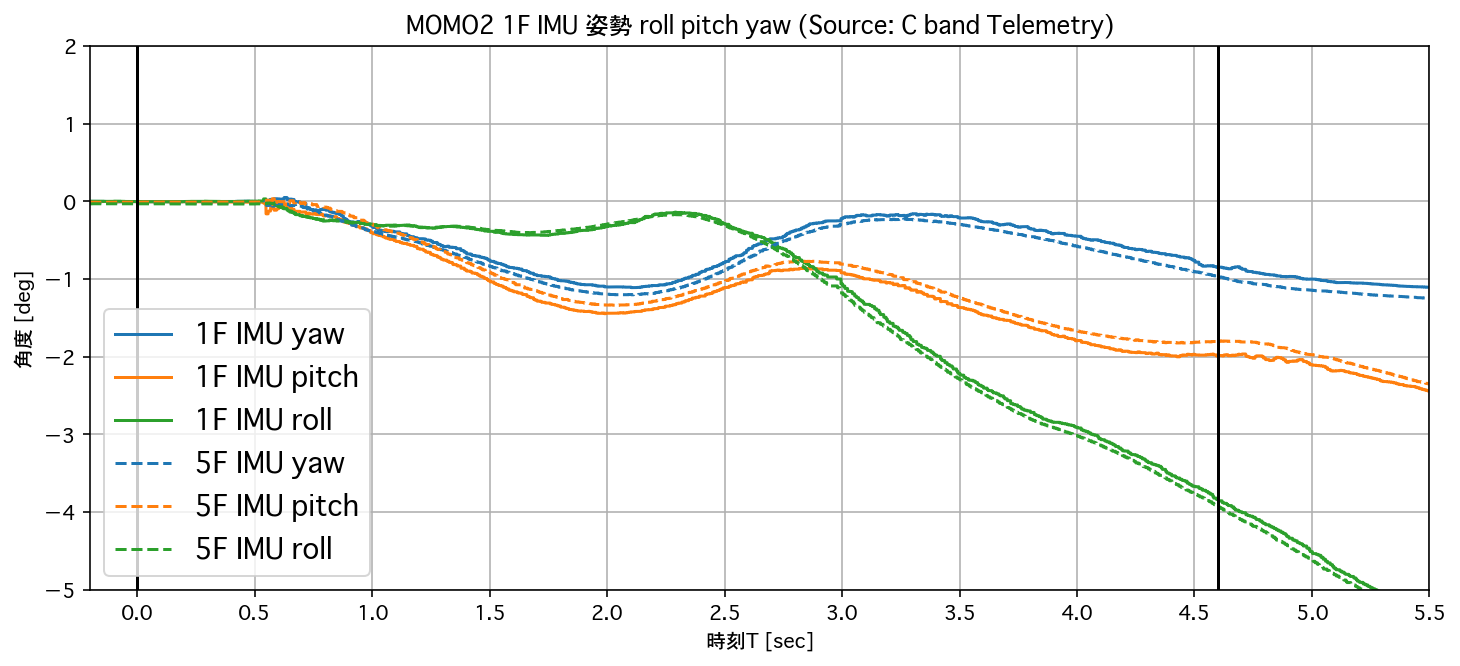

In [0]:
alpha = 1.0
plt.figure()
plt.plot(df1[1], df1[63], "-", alpha=alpha, color="C0", label="1F IMU yaw")
plt.plot(df1[1], df1[64], "-", alpha=alpha, color="C1", label="1F IMU pitch")
plt.plot(df1[1], df1[65], "-", alpha=alpha, color="C2", label="1F IMU roll")
plt.plot(df1[1], df1[79], "--", alpha=alpha, color="C0", label="5F IMU yaw")
plt.plot(df1[1], df1[80], "--", alpha=alpha, color="C1", label="5F IMU pitch")
plt.plot(df1[1], df1[81], "--", alpha=alpha, color="C2", label="5F IMU roll")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO2 1F IMU 姿勢 roll pitch yaw " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("角度 [deg]")
plt.xticks(np.arange(-7,8.5,0.5))
# plt.yticks(np.arange(-4,4.5,0.5))
plt.xlim([-0.2, 5.5])
plt.ylim([-5, 2])
plt.axvline(x=0, color="k")
plt.axvline(x=4.6, color="k")
plt.savefig(savename + PC_num + "attitude_roll_pitch_yaw" + ".png")


## 姿勢(AZ-EL-roll)

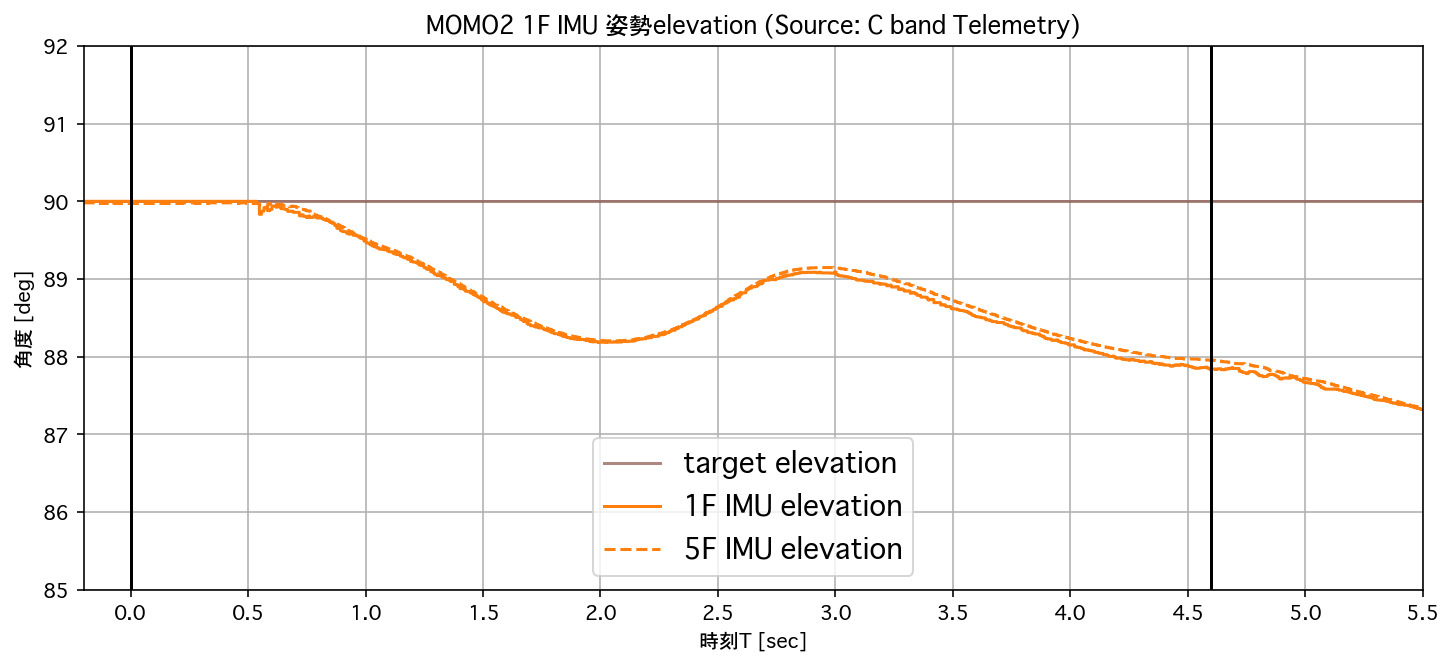

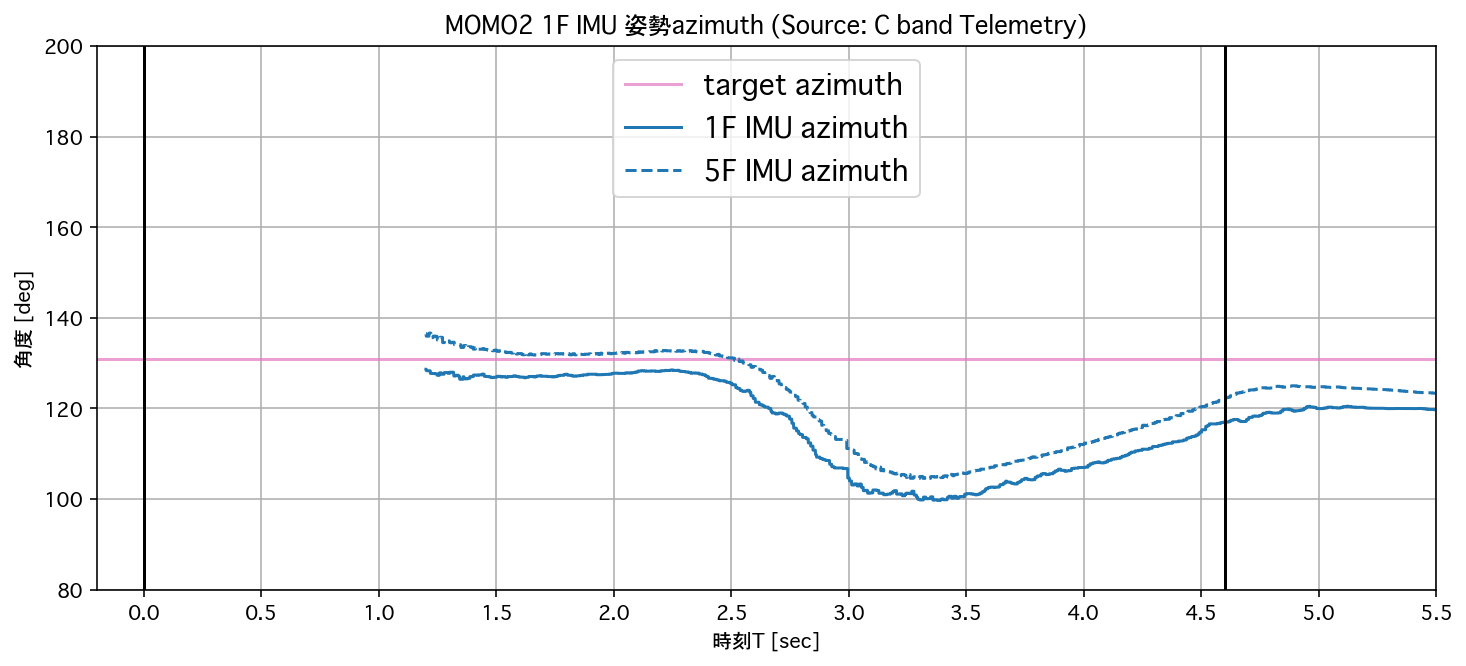

In [0]:
alpha = 1.0
plt.figure()
plt.axhline(y=90, color="C5", alpha = 0.7, label="target elevation")
plt.plot(df1[1], df1[67], "-", alpha=alpha, color="C1", label="1F IMU elevation")
plt.plot(df1[1], df1[83], "--", alpha=alpha, color="C1", label="5F IMU elevation")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO2 1F IMU 姿勢 elevation " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("角度 [deg]")
plt.xticks(np.arange(-7,8.5,0.5))
# plt.yticks(np.arange(-4,4.5,0.5))
plt.xlim([-0.2, 5.5])
plt.ylim([85, 92])
plt.axvline(x=0, color="k")
plt.axvline(x=4.6, color="k")
plt.savefig(savename + PC_num + "attitude_elevation" + ".png")

alpha = 1.0
plt.figure()
plt.axhline(y=131, color="C6", alpha = 0.7, label="target azimuth")
plt.plot(df1[1].loc[df1[1]>1.2], df1[66].loc[df1[1]>1.2], "-", alpha=alpha, color="C0", label="1F IMU azimuth")
plt.plot(df1[1].loc[df1[1]>1.2], df1[82].loc[df1[1]>1.2], "--", alpha=alpha, color="C0", label="5F IMU azimuth")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO2 1F IMU 姿勢 azimuth " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("角度 [deg]")
plt.xticks(np.arange(-7,8.5,0.5))
# plt.yticks(np.arange(-4,4.5,0.5))
plt.xlim([-0.2, 5.5])
plt.ylim([80, 200])
plt.axvline(x=0, color="k")
plt.axvline(x=4.6, color="k")
plt.savefig(savename + PC_num + "attitude_azimuth" + ".png")


## 姿勢と制御

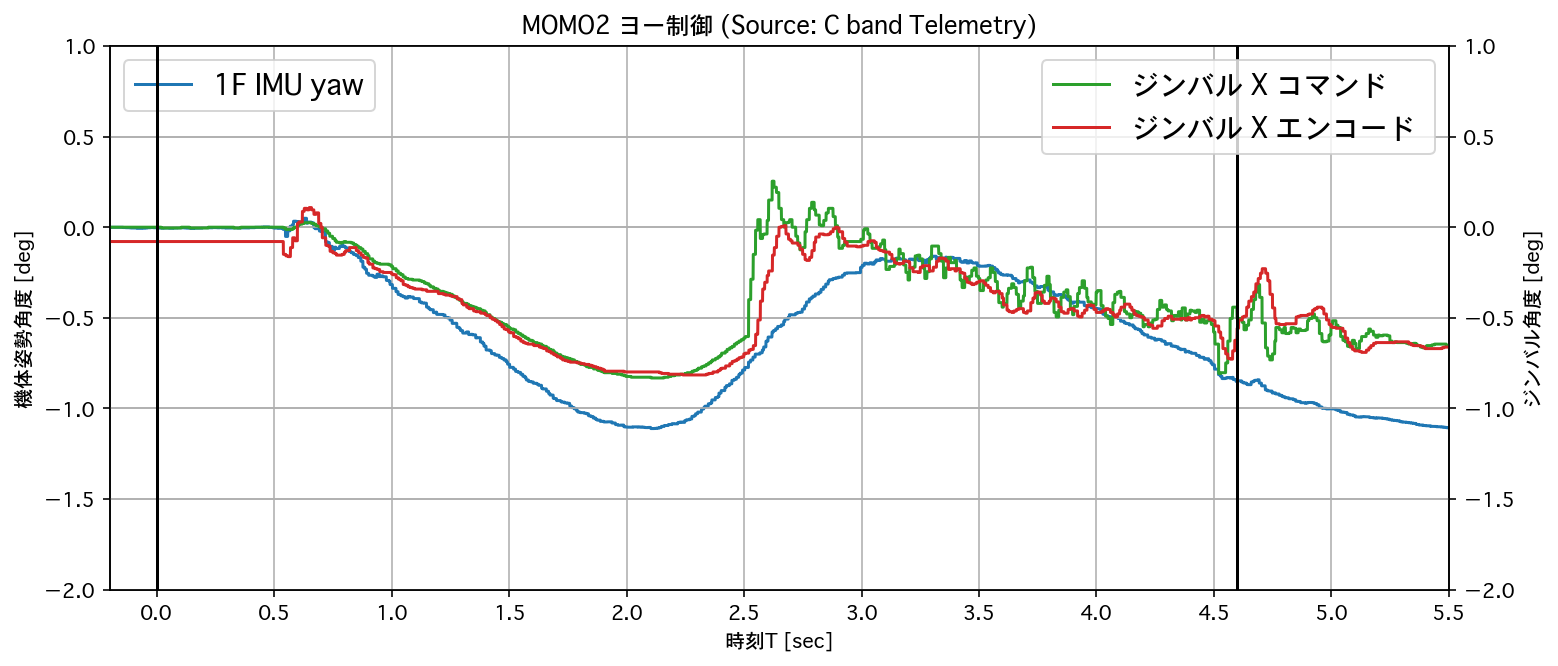

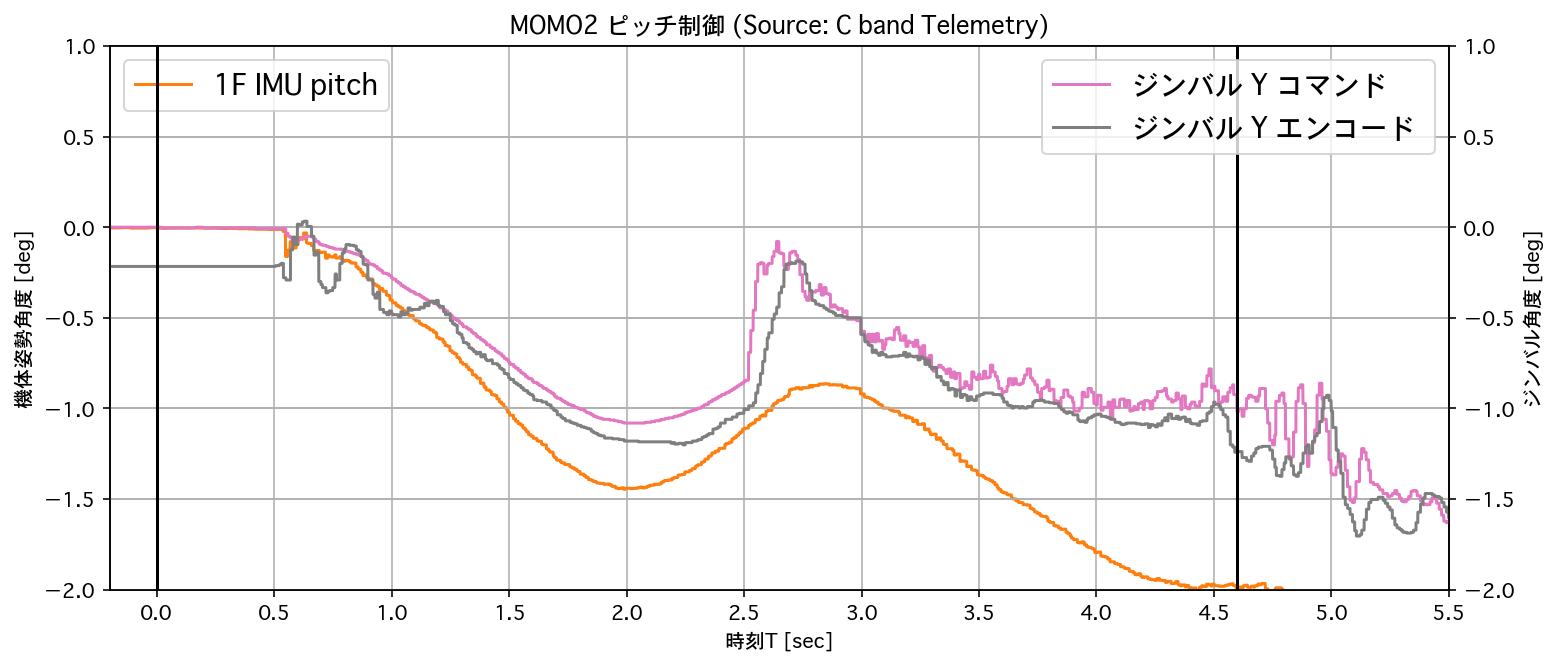

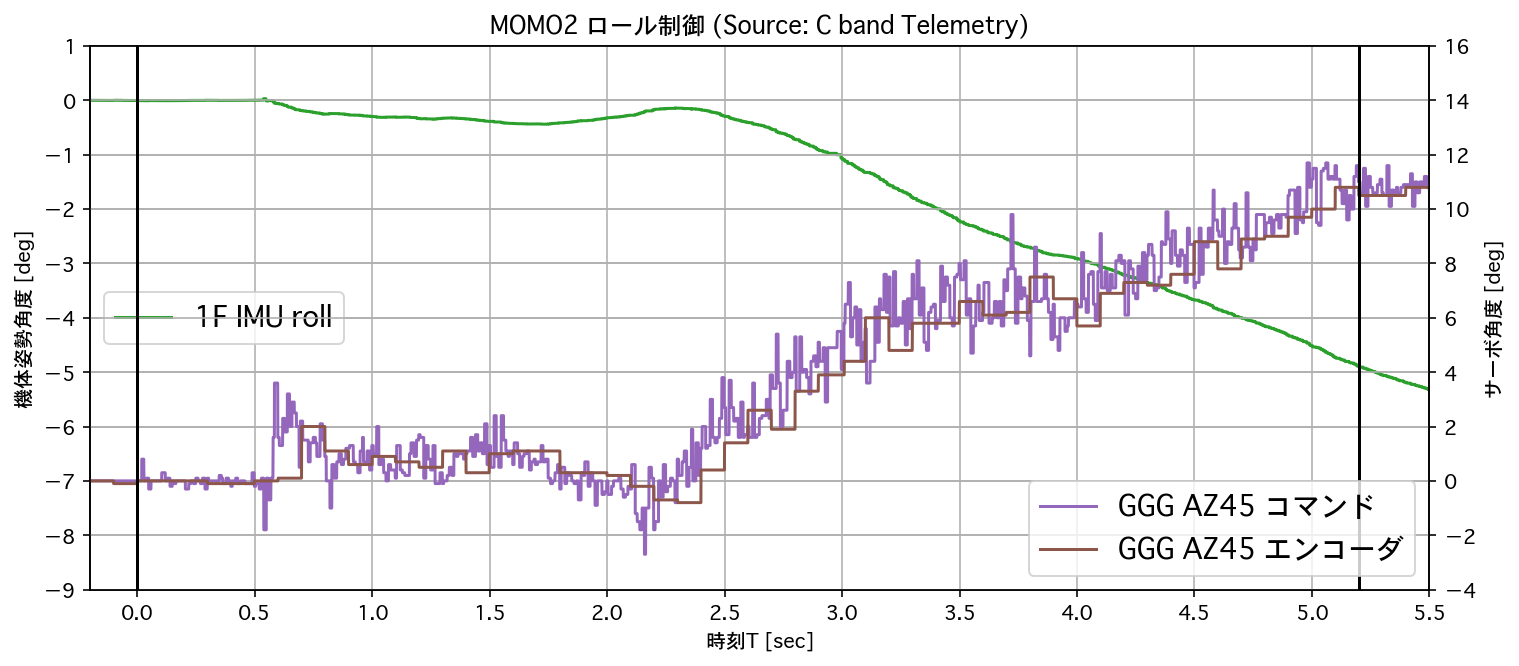

In [0]:
plt.figure()
plt.plot(df1[1], df1[63], "-", alpha=alpha, color="C0", label="1F IMU yaw")
plt.ylim([-2, 1])
# plt.yticks(np.arange(-9,2,1))
plt.legend(fontsize=14, loc="upper left")
plt.ylabel("機体姿勢角度 [deg]")
plt.grid()
plt.xlabel("時刻T [sec]")
plt.twinx()
plt.plot(df1[1], df1[50], "-", alpha=alpha, color="C2", label="ジンバル X コマンド ")
plt.plot(df1[1], df1[51], "-", alpha=alpha, color="C3", label="ジンバル X エンコード ")
plt.grid()
plt.legend(fontsize=14, loc="upper right")
plt.title("MOMO2 ヨー制御 " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("ジンバル角度 [deg]")
plt.xticks(np.arange(-7,8.5,0.5))
plt.xlim([-0.2, 5.5])
plt.ylim([-2, 1])
# plt.yticks(np.arange(-4,17,2))
plt.axvline(x=0, color="k")
plt.axvline(x=4.6, color="k")
plt.savefig(savename + PC_num + "control_gimbalX" + ".png")

plt.figure()
plt.plot(df1[1], df1[64], "-", alpha=alpha, color="C1", label="1F IMU pitch")
plt.ylim([-2, 1])
# plt.yticks(np.arange(-9,2,1))
plt.legend(fontsize=14, loc="upper left")
plt.ylabel("機体姿勢角度 [deg]")
plt.xlabel("時刻T [sec]")
plt.grid()
plt.twinx()
plt.plot(df1[1], df1[53], "-", alpha=alpha, color="C6", label="ジンバル Y コマンド ")
plt.plot(df1[1], df1[54], "-", alpha=alpha, color="C7", label="ジンバル Y エンコード ")
plt.grid()
plt.legend(fontsize=14, loc="upper right")
plt.title("MOMO2 ピッチ制御 " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("ジンバル角度 [deg]")
plt.xticks(np.arange(-7,8.5,0.5))
plt.xlim([-0.2, 5.5])
plt.ylim([-2, 1])
# plt.yticks(np.arange(-4,17,2))
plt.axvline(x=0, color="k")
plt.axvline(x=4.6, color="k")
plt.savefig(savename + PC_num + "control_gimbalY" + ".png")


plt.figure()
plt.plot(df1[1], df1[65], "-", alpha=alpha, color="C2", label="1F IMU roll")
plt.ylim([-9, 1])
plt.yticks(np.arange(-9,2,1))
plt.legend(fontsize=14, loc="center left")
plt.ylabel("機体姿勢角度 [deg]")
plt.xlabel("時刻T [sec]")
plt.grid()
plt.twinx()
plt.plot(df1[1], df1[55], "-", alpha=alpha, color="C4", label="GGG AZ45 コマンド ")
plt.plot(df1[1], df1[56], "-", alpha=alpha, color="C5", label="GGG AZ45 エンコーダ")
plt.grid()
plt.legend(fontsize=14, loc="lower right")
plt.title("MOMO2 ロール制御 " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("サーボ角度 [deg]")
plt.xticks(np.arange(-7,8.5,0.5))
plt.xlim([-0.2, 5.5])
plt.ylim([-4, 16])
plt.yticks(np.arange(-4,17,2))
plt.axvline(x=0, color="k")
plt.axvline(x=5.2, color="k")
plt.savefig(savename + PC_num + "control_rollGGG" + ".png")


## コマンド受信強度

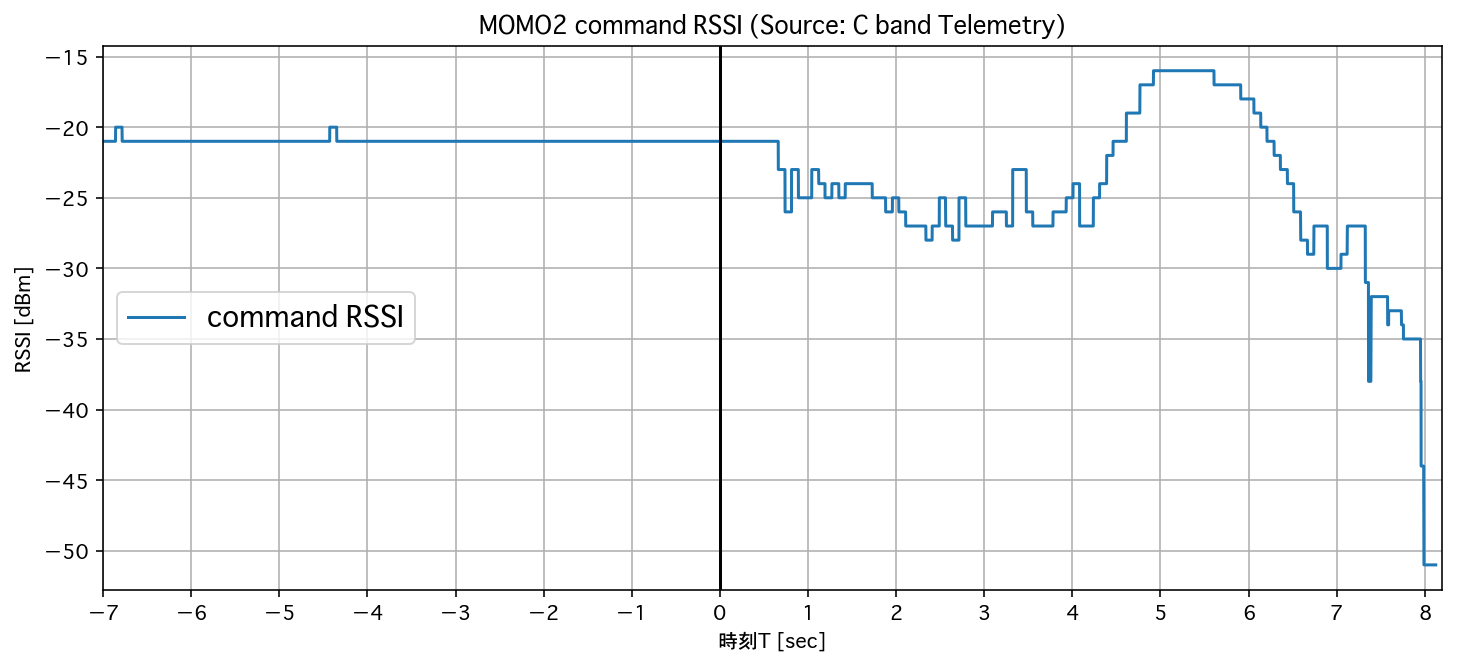

In [0]:
plt.figure()
plt.plot(df1[1], df1[95], "-", color="C0", alpha=alpha, label="command RSSI")
plt.grid()
plt.legend(fontsize=14, loc = "center left")
plt.title("MOMO2 command RSSI " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("RSSI [dBm]")
plt.xticks(np.arange(-7,12,1))
plt.xlim([-7, 8.2])
plt.axvline(x=0, color="k")
plt.savefig(savename + PC_num + "telemetry_command_RSSI" + ".png")


## CANバスエラー

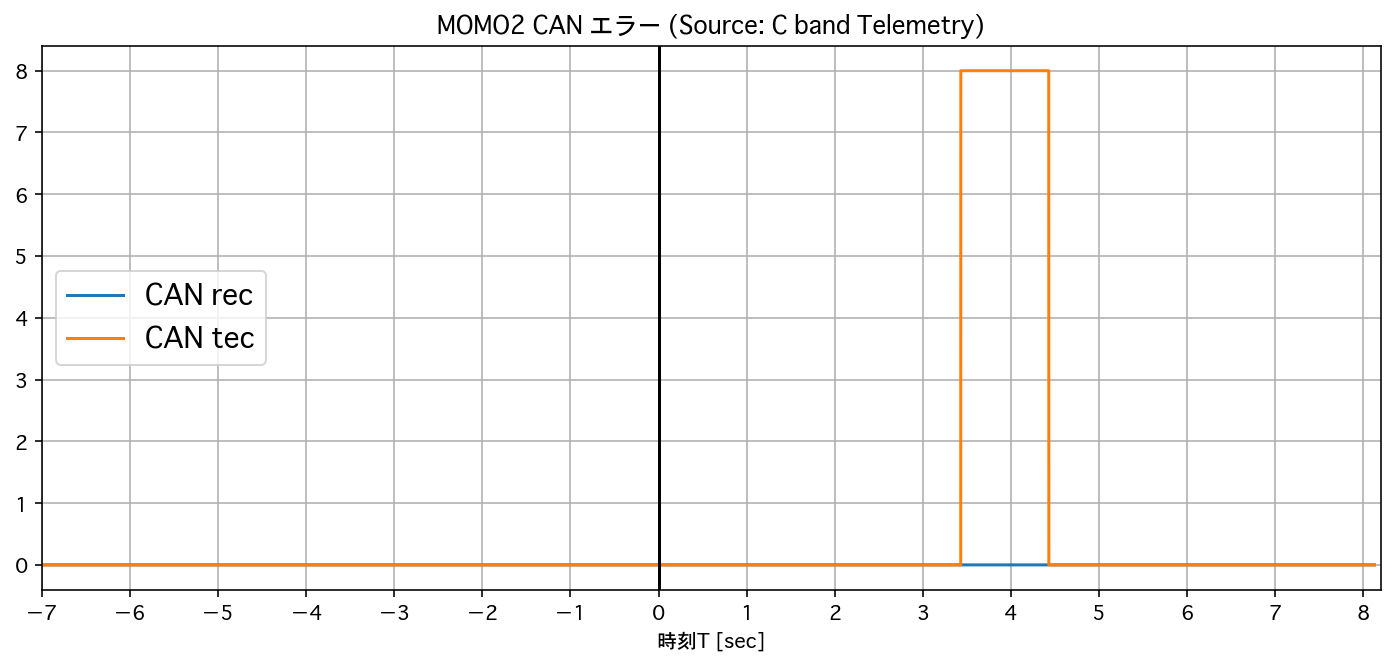

In [0]:
plt.figure()
plt.plot(df1[1], df1[96], "-", color="C0", alpha=alpha, label="CAN rec")
plt.plot(df1[1], df1[97], "-", color="C1", alpha=alpha, label="CAN tec")
plt.grid()
plt.legend(fontsize=14, loc = "center left")
plt.title("MOMO2 CAN エラー " + source_txt)
plt.xlabel("時刻T [sec]")
plt.xticks(np.arange(-7,12,1))
plt.xlim([-7, 8.2])
plt.axvline(x=0, color="k")
plt.savefig(savename + PC_num + "bus_error" + ".png")


## 電源

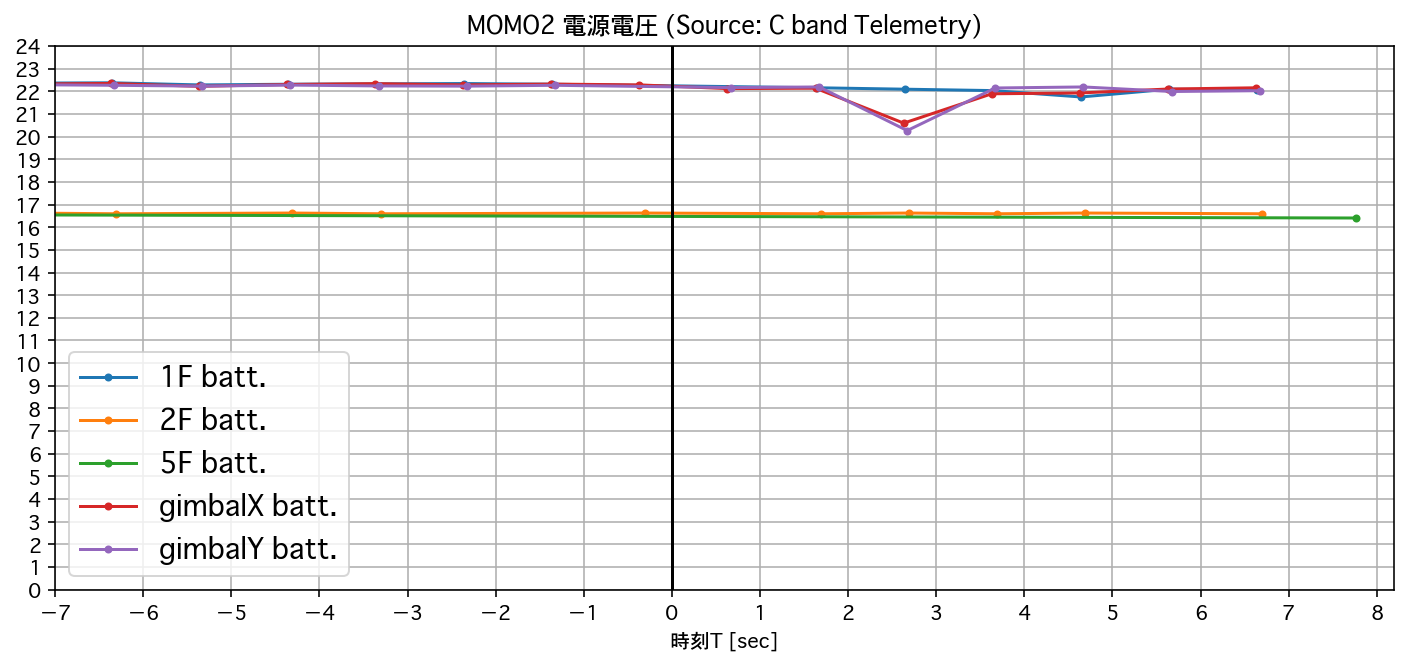

In [0]:
plt.figure()
plt.plot(df1[1].loc[df1[98].diff()!=0.0], df1[98].loc[df1[98].diff()!=0.0]/1000, ".-", color="C0", alpha=alpha, label="1F batt.")
plt.plot(df1[1].loc[df1[99].diff()!=0.0], df1[99].loc[df1[99].diff()!=0.0]/1000, ".-", color="C1", alpha=alpha, label="2F batt.")
plt.plot(df1[1].loc[df1[100].diff()!=0.0], df1[100].loc[df1[100].diff()!=0.0]/1000, ".-", color="C2", alpha=alpha, label="5F batt.")
plt.plot(df1[1].loc[df1[101].diff()!=0.0], df1[101].loc[df1[101].diff()!=0.0], ".-", color="C3", alpha=alpha, label="gimbalX batt.")
plt.plot(df1[1].loc[df1[103].diff()!=0.0], df1[103].loc[df1[103].diff()!=0.0], ".-", color="C4", alpha=alpha, label="gimbalY batt.")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO2 電源電圧 " + source_txt)
plt.xlabel("時刻T [sec]")
plt.xticks(np.arange(-7,12,1))
plt.yticks(np.arange(0,25,1))
plt.xlim([-7, 8.2])
plt.ylim(ymin=0)
plt.axvline(x=0, color="k")
plt.savefig(savename + PC_num + "battery_voltage" + ".png")


## 振動センサ

### ID範囲
* 歪みゲージ: 0x640〜0x67F
* 振動センサー: 0x680〜0x6BF

### 定数値：
* 歪みゲージのベースオフセット: 0x640
* 振動センサーのベースオフセット: 0x680
* 階数オフセット: 1F=0x00 2F=0x10 3F=0x20

CAN_ID = ベースオフセット + 階数オフセット + 物理ポートID

※ 各階はAzimuthの昇順に物理ポートに接続されています。

※ 4Fの歪みゲージは3FのUART5〜8(物理ポート4〜7)に配置。


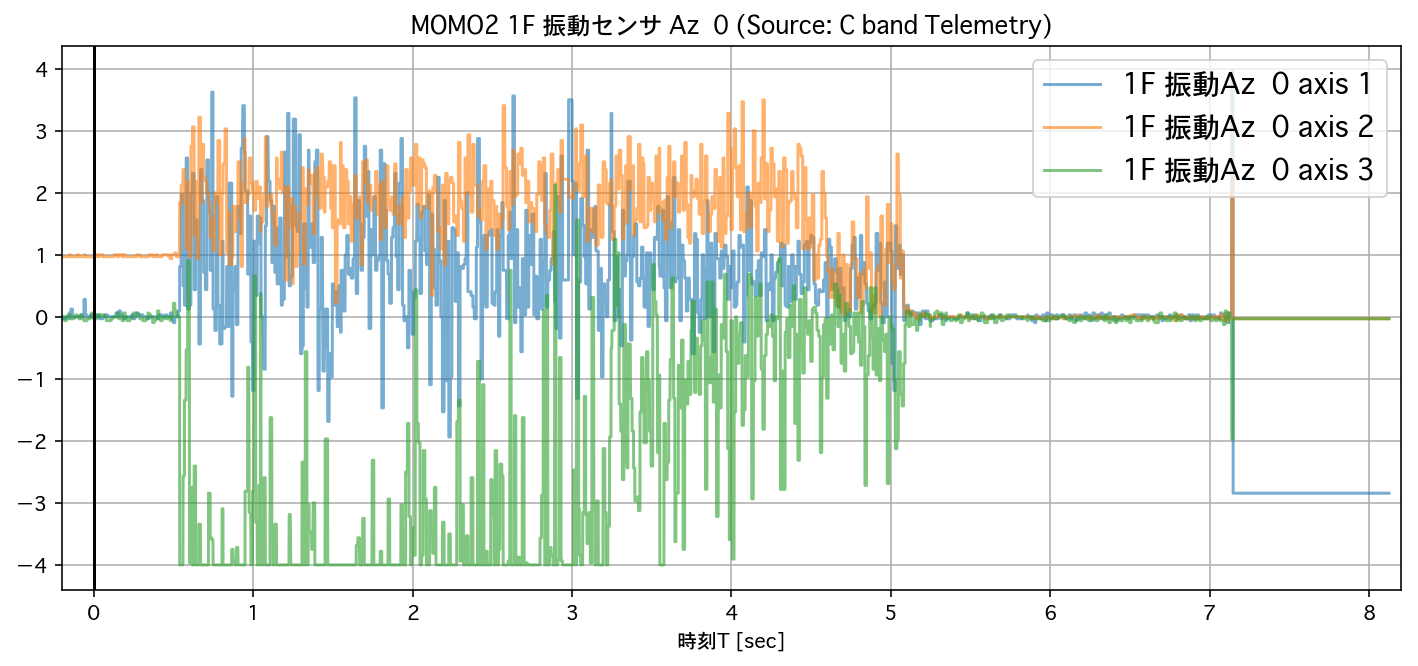

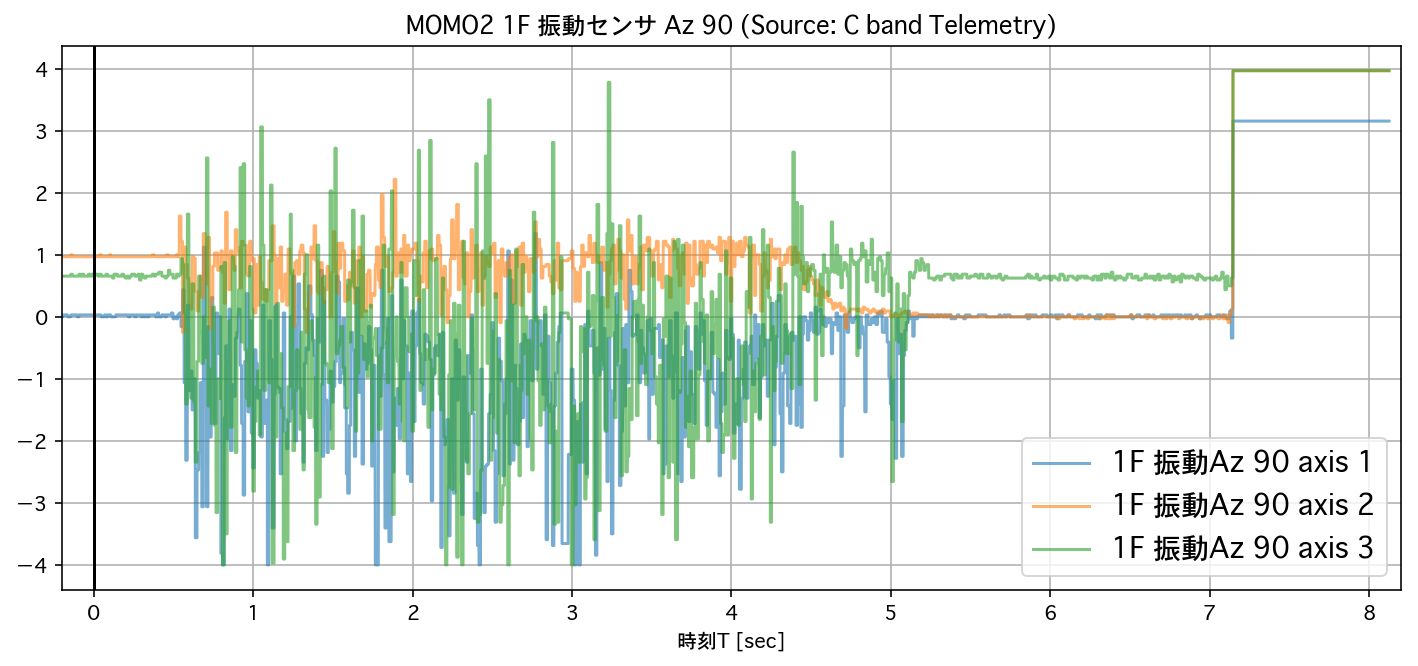

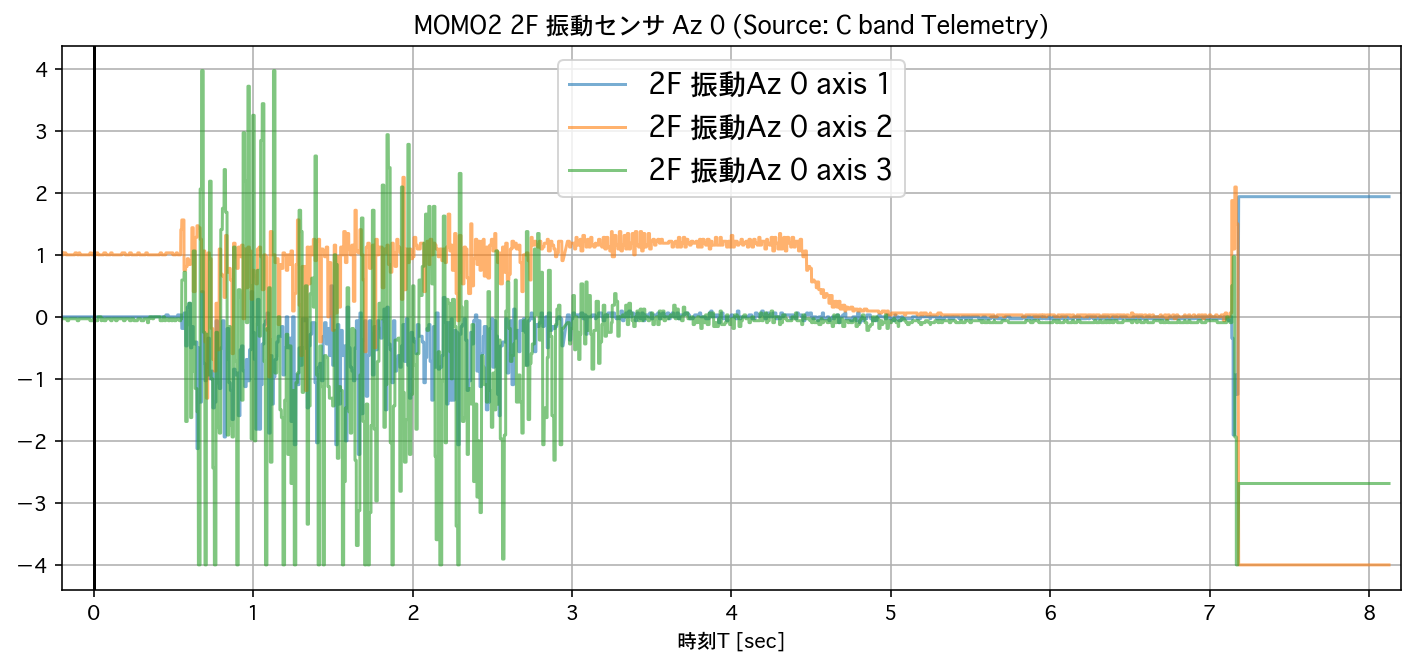

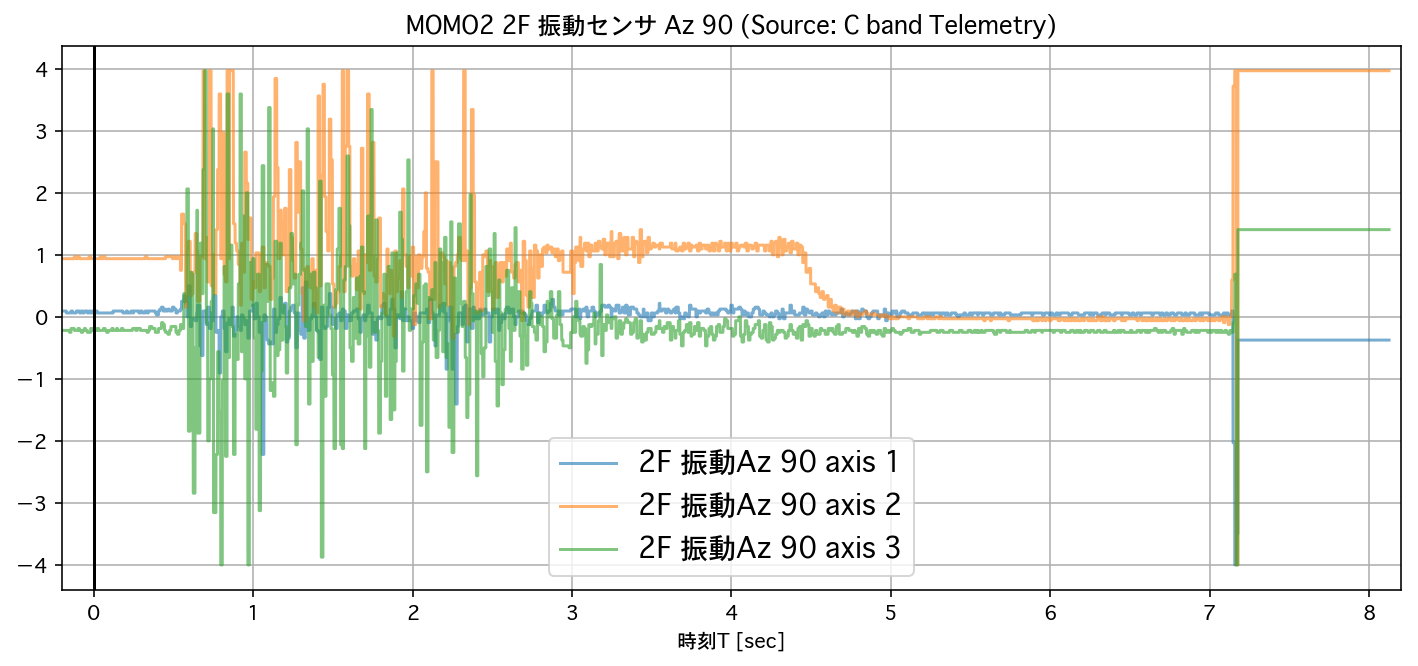

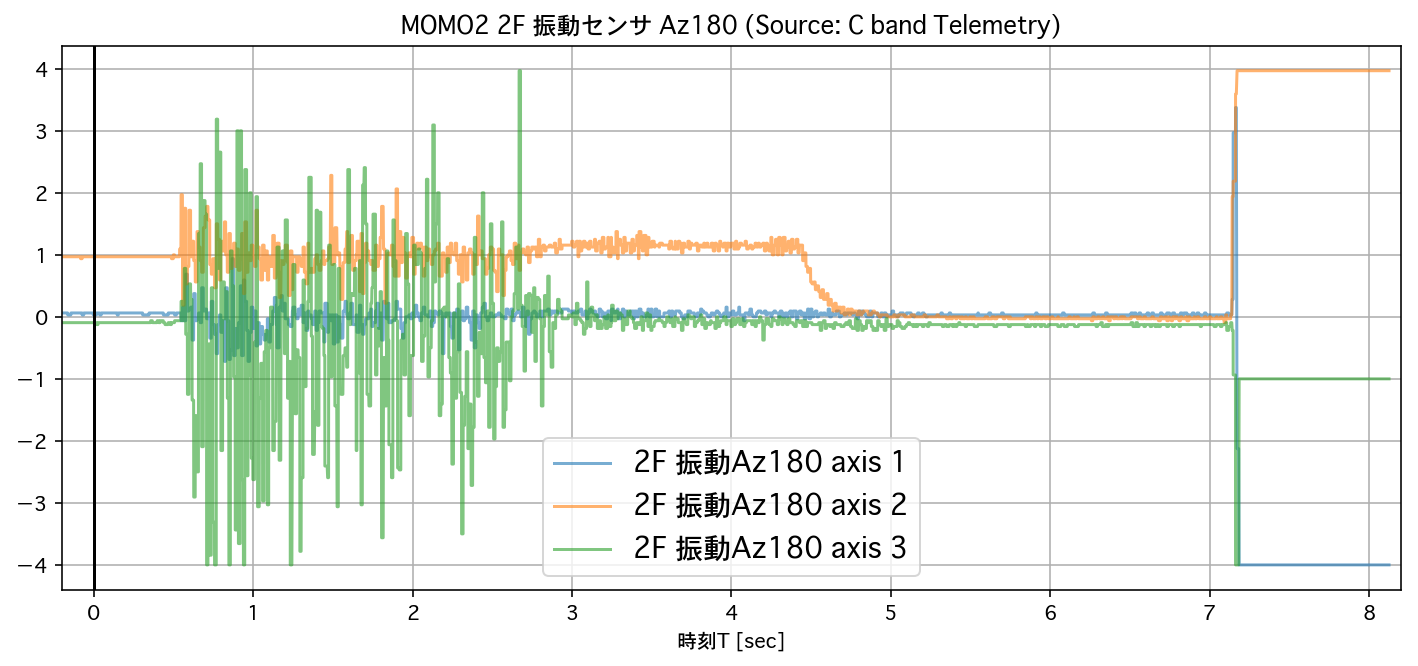

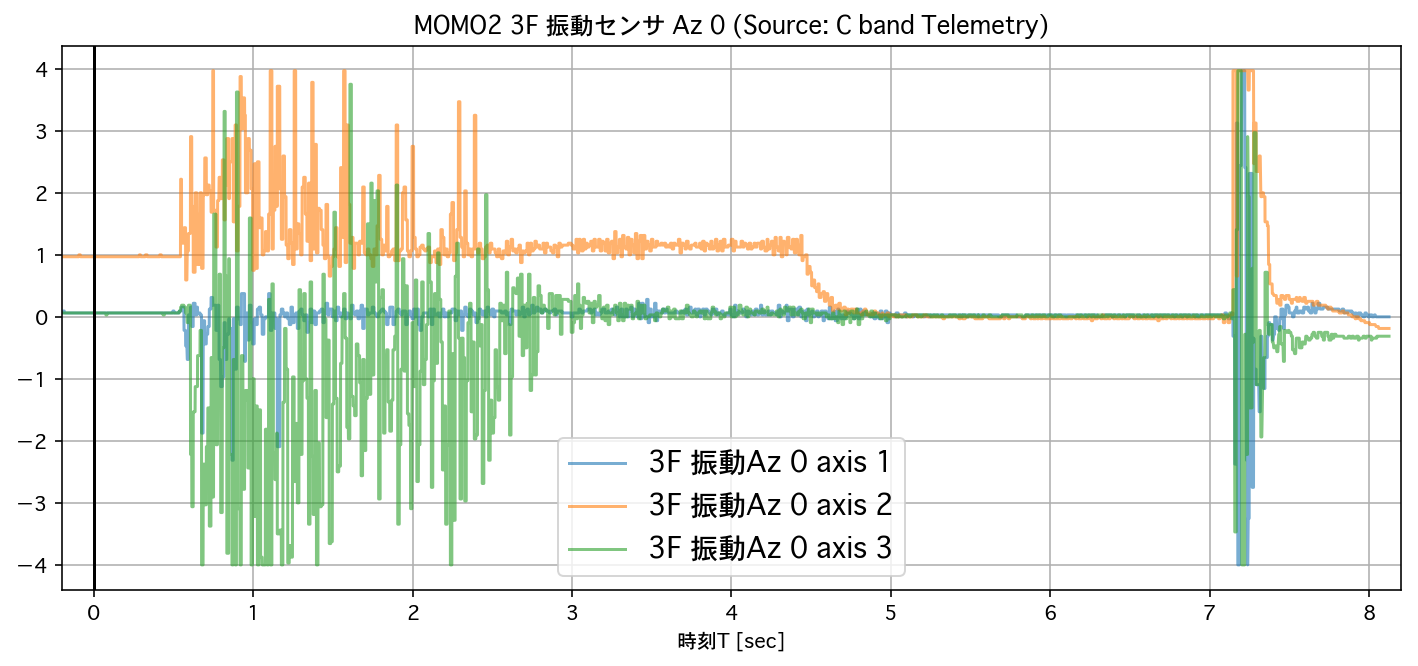

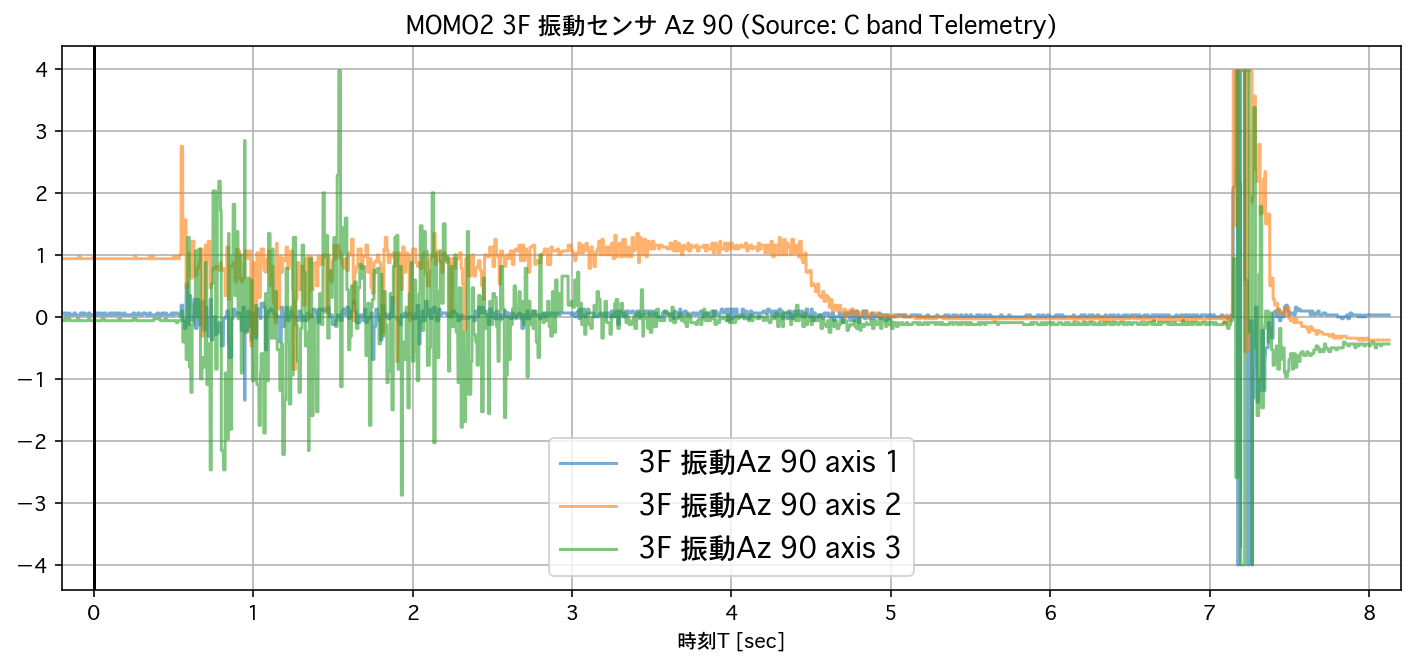

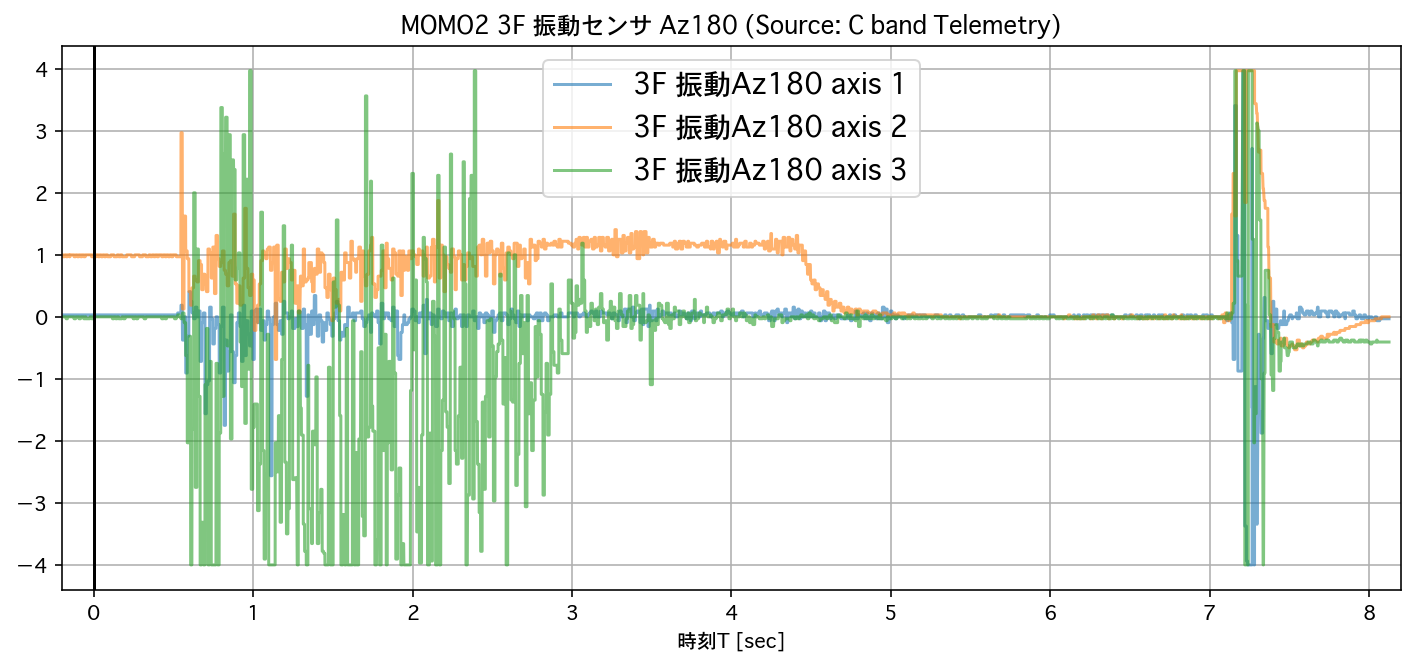

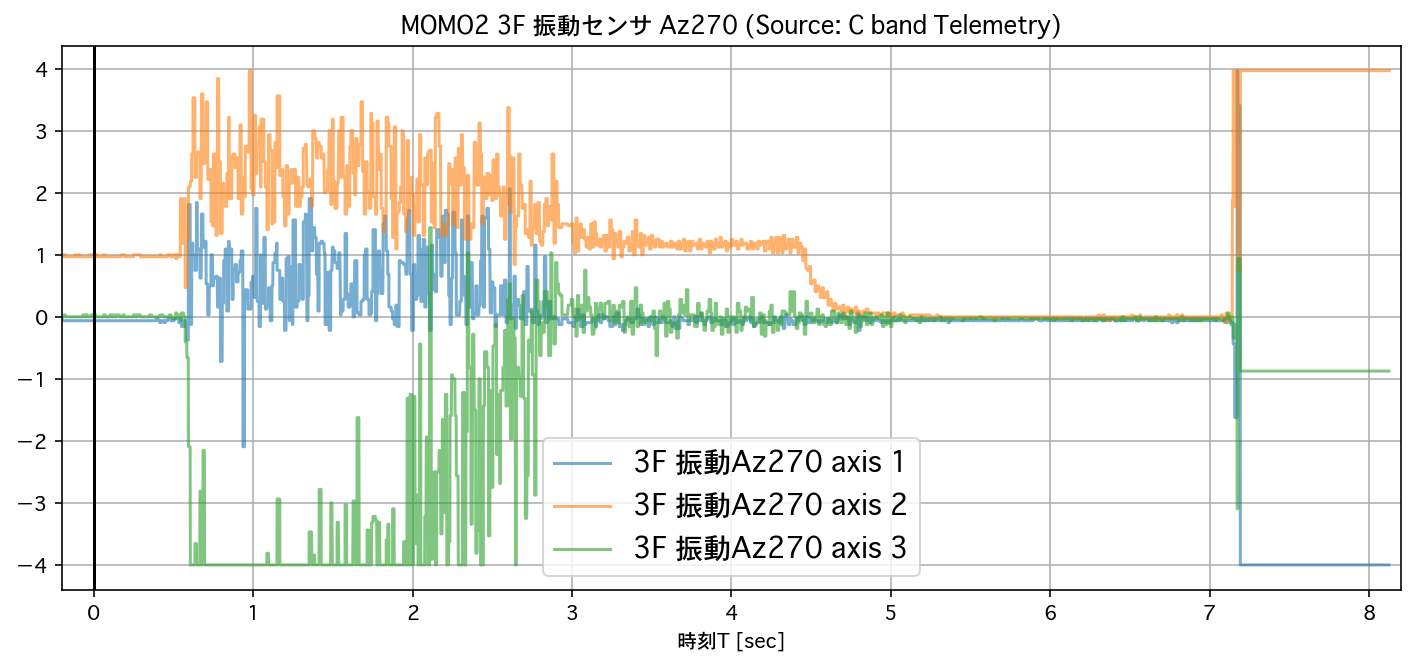

In [0]:
alpha = 0.6
def plot_vibration_sensor(axis1, num_stage, num_str):
    plt.figure()
    plt.plot(df1[1], df1[axis1], "-", color="C0", alpha=alpha, label="%dF 振動%s axis 1" % (num_stage, num_str))
    plt.plot(df1[1], df1[axis1+1], "-", color="C1", alpha=alpha, label="%dF 振動%s axis 2" % (num_stage, num_str))
    plt.plot(df1[1], df1[axis1+2], "-", color="C2", alpha=alpha, label="%dF 振動%s axis 3" % (num_stage, num_str))
    plt.grid()
    plt.legend(fontsize=14)
    plt.title("MOMO2 %dF 振動センサ %s " % (num_stage, num_str) + source_txt)
    plt.xlabel("時刻T [sec]")
    plt.xticks(np.arange(-7,12,1))
    plt.xlim([-0.2, 8.2])
    plt.axvline(x=0, color="k")
    plt.savefig(savename + PC_num + "sensor_vib_%dF%s" % (num_stage, num_str) + ".png")

plot_vibration_sensor(105, 1, "Az  0")
plot_vibration_sensor(109, 1, "Az 90")
plot_vibration_sensor(113, 2, "Az 0")
plot_vibration_sensor(117, 2, "Az 90")
plot_vibration_sensor(121, 2, "Az180")
plot_vibration_sensor(125, 3, "Az 0")
plot_vibration_sensor(129, 3, "Az 90")
plot_vibration_sensor(133, 3, "Az180")
plot_vibration_sensor(137, 3, "Az270")


## GPS

In [10]:
import pymap3d as pm  # $> pip install pymap3d

lat, lon, alt = 42.506129, 143.456482, 15.0  # ランチャーの緯度経度
geoid_alt = 24.04
A = pm.ecef2enu(df_fireflyA["ecef_x[m]"], df_fireflyA["ecef_y[m]"], df_fireflyA["ecef_z[m]"], lat, lon, alt)
B = pm.ecef2enu(df_fireflyB["ecef_x[m]"], df_fireflyB["ecef_y[m]"], df_fireflyB["ecef_z[m]"], lat, lon, alt)


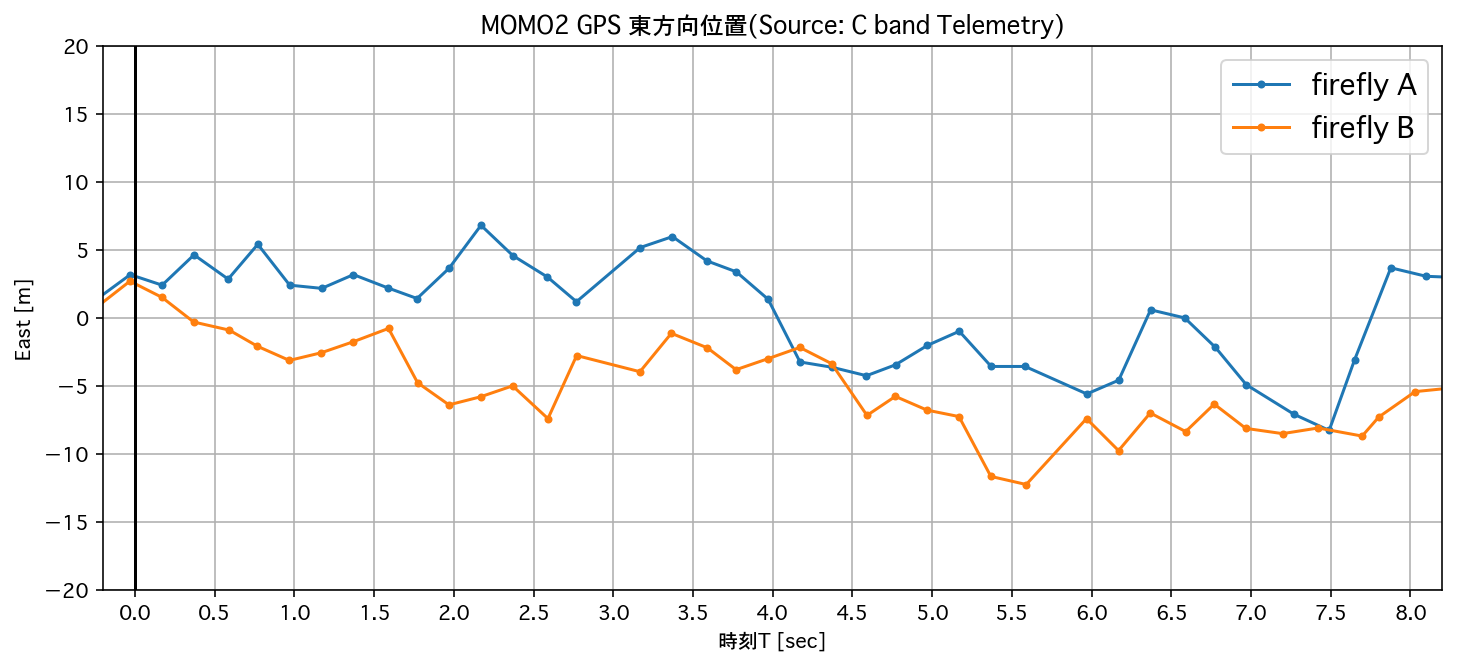

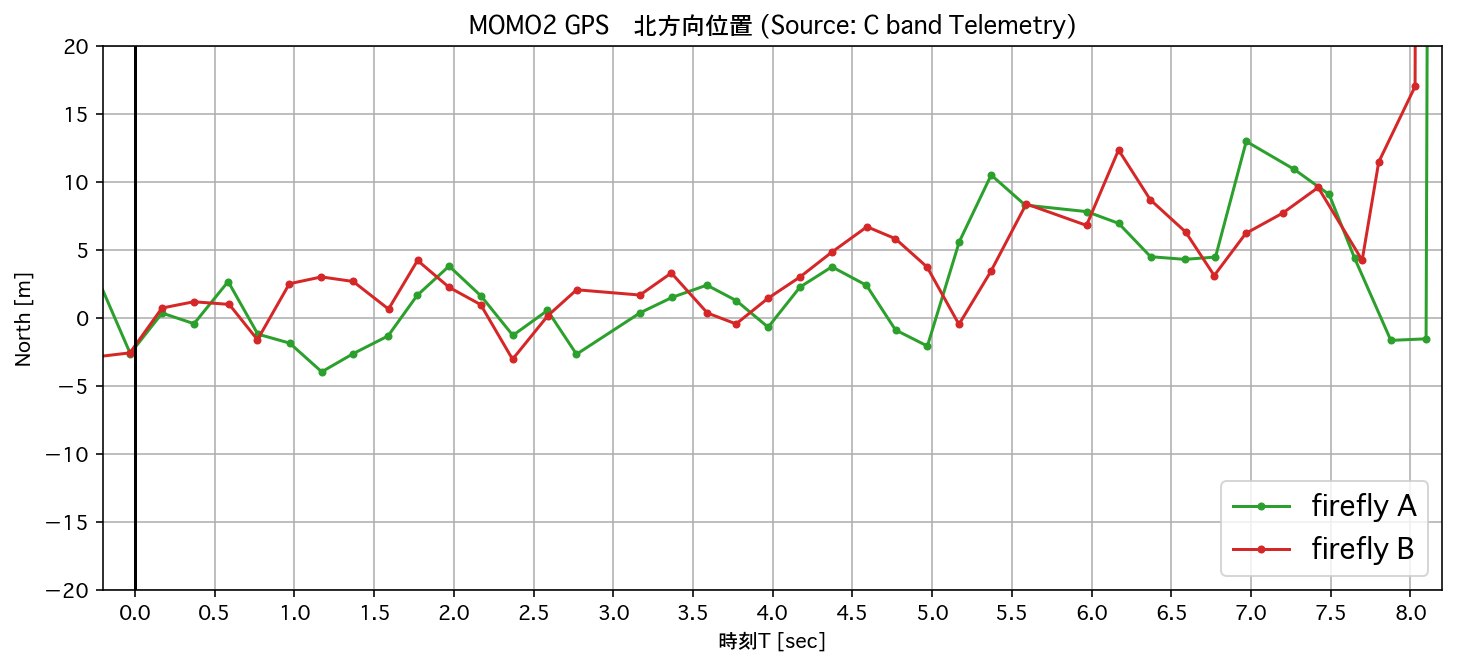

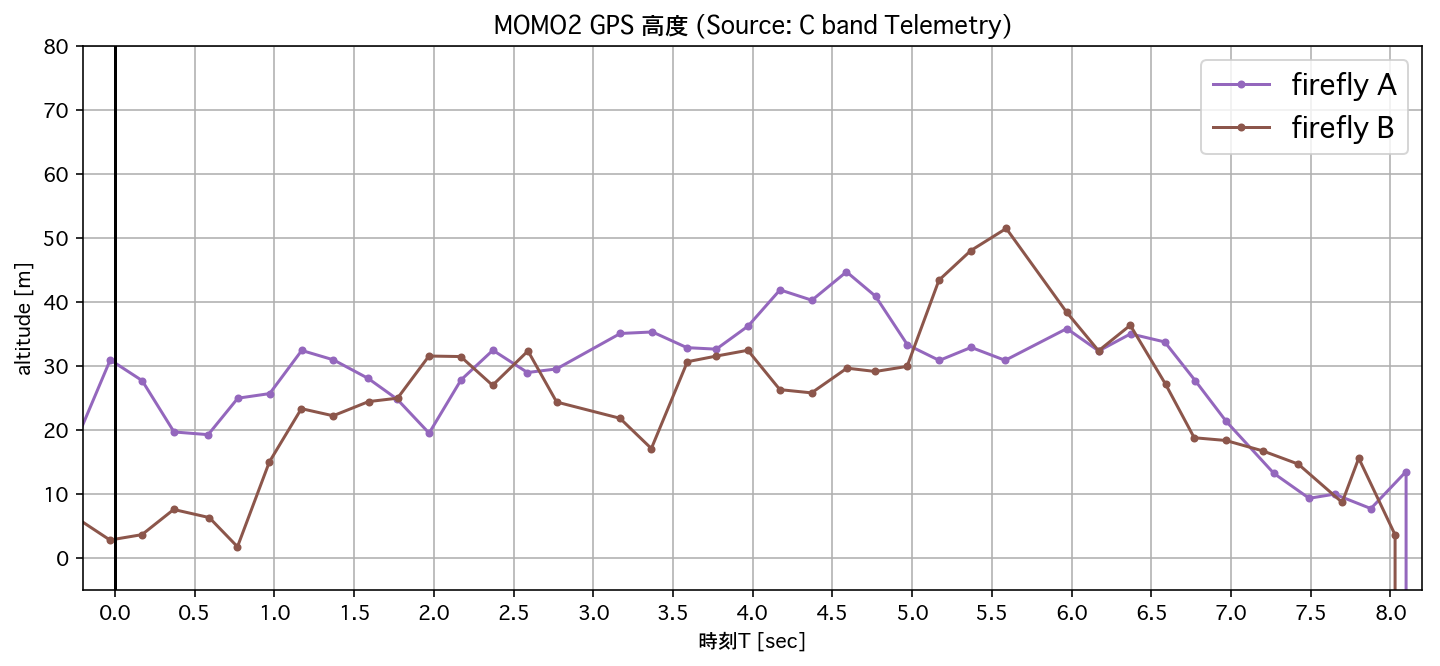

In [11]:
plt.figure()
plt.plot(df_fireflyA["T[s]"], A[0], "C0.-", label="firefly A")
plt.plot(df_fireflyB["T[s]"], B[0], "C1.-", label="firefly B")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO2 GPS 東方向位置" + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("East [m]")
plt.xticks(np.arange(-7,8.5,0.5))
plt.xlim([-0.2, 8.2])
plt.ylim([-20, 20])
plt.axvline(x=0, color="k")
# plt.savefig(savename + "pressure_high" + ".png")

plt.figure()
plt.plot(df_fireflyA["T[s]"], A[1], "C2.-", label="firefly A")
plt.plot(df_fireflyB["T[s]"], B[1], "C3.-", label="firefly B")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO2 GPS　北方向位置 " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("North [m]")
plt.xticks(np.arange(-7,8.5,0.5))
plt.xlim([-0.2, 8.2])
plt.ylim([-20, 20])
plt.axvline(x=0, color="k")
# plt.savefig(savename + "pressure_high" + ".png")

plt.figure()
plt.plot(df_fireflyA["T[s]"], A[2]-geoid_alt, "C4.-", label="firefly A")
plt.plot(df_fireflyB["T[s]"], B[2]-geoid_alt, "C5.-", label="firefly B")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO2 GPS 高度 " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("altitude [m]")
plt.xticks(np.arange(-7,8.5,0.5))
plt.xlim([-0.2, 8.2])
plt.ylim([-5, 80])
plt.axvline(x=0, color="k")
# plt.savefig(savename + "pressure_high" + ".png")


